In [13]:
import torch

In [33]:
class BernoulliVariationalAutoencoder(torch.nn.Module):
    def __init__(self, in_features=167, hidden_features=32, latent_features=2):
        super(BernoulliVariationalAutoencoder, self).__init__()
        
        # share layers and only split the last layer
        
        self.h_encoder = torch.nn.Sequential(
            torch.nn.Linear(in_features, hidden_features),
            torch.nn.ReLU(),
        )
        
        self.h_to_mu = torch.nn.Linear(hidden_features, latent_features,)
        
        self.h_to_log_sigma = torch.nn.Linear(hidden_features, latent_features,)
        
        self._f_zx = torch.nn.Sequential(
            torch.nn.Linear(latent_features, hidden_features),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_features, in_features),
        )
        
    def f_xz(self, x):
        h = self.h_encoder(x)
        mu = self.h_to_mu(h)
        log_sigma = self.h_to_log_sigma(h)
        
        return torch.distributions.normal.Normal(
            mu,
            log_sigma.exp(),
        )
        
    def f_zx(self, z):
        return self._f_zx(z)
    
    def condition(self, z):
        output_params = torch.sigmoid(
            self.f_zx(z)
        )
        target_distribution = torch.distributions.bernoulli.Bernoulli(
            probs=output_params
        )
        
        return target_distribution
    
        #     def generate(self):
        #         z_prior = torch.distributions.normal.Normal(
        #             torch.zeros()
        #         )
        
    def get_loss(self, x):
        z_distribution = self.f_xz(x)
        z = z_distribution.rsample()
        z_prior = torch.distributions.normal.Normal(
            torch.zeros_like(z),
            torch.ones_like(z),
        )
        
        target_distribution = self.condition(z)
        
        log_likelihood_of_z_under_prior = z_prior.log_prob(z).sum()
        log_likelihood_of_z_under_q = z_distribution.log_prob(z).sum()
        log_likelihood_of_data = target_distribution.log_prob(x).sum()
        
        elbo = log_likelihood_of_data - (log_likelihood_of_z_under_q - log_likelihood_of_z_under_prior)
        return -elbo

In [53]:
vae = BernoulliVariationalAutoencoder(hidden_features=128, latent_features=2)

In [61]:
vae_big = BernoulliVariationalAutoencoder(hidden_features=128, latent_features=20)

In [54]:
import pandas as pd
df = pd.read_csv("/Users/wangy1/Documents/GitHub/pinot/pinot/data/moonshot_with_date.csv")
moonshot_smiles = df["SMILES"]
df_series = pd.read_csv("activity_data.csv")
df = df.merge(df_series, how="left")
from rdkit import Chem
mols = [Chem.MolFromSmiles(smiles) for smiles in moonshot_smiles]
from rdkit.Chem import MACCSkeys
import numpy as np
fps = np.array([MACCSkeys.GenMACCSKeys(x) for x in mols])
x = torch.tensor(fps, dtype=torch.float32)

In [55]:
y = np.nan_to_num(df["f_inhibition_at_20_uM"].values, 0.0)
y = (y - np.mean(y)) / np.std(y)

In [56]:
vae.get_loss(x)

tensor(112223.1406, grad_fn=<NegBackward>)

In [57]:
optimizer = torch.optim.Adam(vae.parameters(), 1e-3)

for _ in range(10000):
    optimizer.zero_grad()
    loss = vae.get_loss(x)
    print(loss)
    loss.backward()
    optimizer.step()
    

tensor(112238.7500, grad_fn=<NegBackward>)
tensor(110466.9141, grad_fn=<NegBackward>)
tensor(108979.2500, grad_fn=<NegBackward>)
tensor(107550.6641, grad_fn=<NegBackward>)
tensor(106230.3203, grad_fn=<NegBackward>)
tensor(104784.6719, grad_fn=<NegBackward>)
tensor(103167.9141, grad_fn=<NegBackward>)
tensor(101559.1250, grad_fn=<NegBackward>)
tensor(99748.5234, grad_fn=<NegBackward>)
tensor(97852.2188, grad_fn=<NegBackward>)
tensor(96078.0312, grad_fn=<NegBackward>)
tensor(94270.2656, grad_fn=<NegBackward>)
tensor(92063.6016, grad_fn=<NegBackward>)
tensor(89239.1172, grad_fn=<NegBackward>)
tensor(87947.5938, grad_fn=<NegBackward>)
tensor(86175.2344, grad_fn=<NegBackward>)
tensor(84516.9844, grad_fn=<NegBackward>)
tensor(82533.1719, grad_fn=<NegBackward>)
tensor(80897.0703, grad_fn=<NegBackward>)
tensor(80028.3125, grad_fn=<NegBackward>)
tensor(78272.3828, grad_fn=<NegBackward>)
tensor(76565.3203, grad_fn=<NegBackward>)
tensor(75386.2969, grad_fn=<NegBackward>)
tensor(74044.7109, grad_fn

tensor(44160.8555, grad_fn=<NegBackward>)
tensor(44175.4766, grad_fn=<NegBackward>)
tensor(44136.3711, grad_fn=<NegBackward>)
tensor(44108.8750, grad_fn=<NegBackward>)
tensor(44032.5664, grad_fn=<NegBackward>)
tensor(44023.3359, grad_fn=<NegBackward>)
tensor(43975.7344, grad_fn=<NegBackward>)
tensor(43974.5664, grad_fn=<NegBackward>)
tensor(43905.6953, grad_fn=<NegBackward>)
tensor(43921.5625, grad_fn=<NegBackward>)
tensor(43855.9141, grad_fn=<NegBackward>)
tensor(43824.4766, grad_fn=<NegBackward>)
tensor(43833.4023, grad_fn=<NegBackward>)
tensor(43746.1250, grad_fn=<NegBackward>)
tensor(43784.7539, grad_fn=<NegBackward>)
tensor(43684.8359, grad_fn=<NegBackward>)
tensor(43656.9258, grad_fn=<NegBackward>)
tensor(43697.7031, grad_fn=<NegBackward>)
tensor(43644.1484, grad_fn=<NegBackward>)
tensor(43579.7656, grad_fn=<NegBackward>)
tensor(43580.4922, grad_fn=<NegBackward>)
tensor(43517.7578, grad_fn=<NegBackward>)
tensor(43470.3750, grad_fn=<NegBackward>)
tensor(43501.0352, grad_fn=<NegBac

tensor(40065.8281, grad_fn=<NegBackward>)
tensor(40051.4336, grad_fn=<NegBackward>)
tensor(40049.0703, grad_fn=<NegBackward>)
tensor(40027.0781, grad_fn=<NegBackward>)
tensor(40006.0820, grad_fn=<NegBackward>)
tensor(40020.8828, grad_fn=<NegBackward>)
tensor(39993.3242, grad_fn=<NegBackward>)
tensor(39937.7734, grad_fn=<NegBackward>)
tensor(39996.3477, grad_fn=<NegBackward>)
tensor(39977.9375, grad_fn=<NegBackward>)
tensor(39968.7969, grad_fn=<NegBackward>)
tensor(39911.7656, grad_fn=<NegBackward>)
tensor(39969.4453, grad_fn=<NegBackward>)
tensor(39905.1875, grad_fn=<NegBackward>)
tensor(39949.2305, grad_fn=<NegBackward>)
tensor(39883.8125, grad_fn=<NegBackward>)
tensor(39923.5391, grad_fn=<NegBackward>)
tensor(39912.7500, grad_fn=<NegBackward>)
tensor(39851.5000, grad_fn=<NegBackward>)
tensor(39829.2422, grad_fn=<NegBackward>)
tensor(39836.9688, grad_fn=<NegBackward>)
tensor(39854.6094, grad_fn=<NegBackward>)
tensor(39858.8945, grad_fn=<NegBackward>)
tensor(39847.8516, grad_fn=<NegBac

tensor(38582.0938, grad_fn=<NegBackward>)
tensor(38542.0742, grad_fn=<NegBackward>)
tensor(38559.6094, grad_fn=<NegBackward>)
tensor(38509.9844, grad_fn=<NegBackward>)
tensor(38521.4531, grad_fn=<NegBackward>)
tensor(38514.9062, grad_fn=<NegBackward>)
tensor(38501.6602, grad_fn=<NegBackward>)
tensor(38503.3320, grad_fn=<NegBackward>)
tensor(38542.0508, grad_fn=<NegBackward>)
tensor(38524.1133, grad_fn=<NegBackward>)
tensor(38506.0977, grad_fn=<NegBackward>)
tensor(38539.6094, grad_fn=<NegBackward>)
tensor(38546.3711, grad_fn=<NegBackward>)
tensor(38479.2344, grad_fn=<NegBackward>)
tensor(38474.5078, grad_fn=<NegBackward>)
tensor(38528.1602, grad_fn=<NegBackward>)
tensor(38471.7148, grad_fn=<NegBackward>)
tensor(38483.5195, grad_fn=<NegBackward>)
tensor(38462.8555, grad_fn=<NegBackward>)
tensor(38470.7812, grad_fn=<NegBackward>)
tensor(38495.4062, grad_fn=<NegBackward>)
tensor(38486.8320, grad_fn=<NegBackward>)
tensor(38489.6016, grad_fn=<NegBackward>)
tensor(38465.9258, grad_fn=<NegBac

tensor(37724.7852, grad_fn=<NegBackward>)
tensor(37697.2422, grad_fn=<NegBackward>)
tensor(37696.4141, grad_fn=<NegBackward>)
tensor(37696.4102, grad_fn=<NegBackward>)
tensor(37684.4062, grad_fn=<NegBackward>)
tensor(37686.8594, grad_fn=<NegBackward>)
tensor(37668.3125, grad_fn=<NegBackward>)
tensor(37690.9102, grad_fn=<NegBackward>)
tensor(37712.1914, grad_fn=<NegBackward>)
tensor(37698.6797, grad_fn=<NegBackward>)
tensor(37682.6641, grad_fn=<NegBackward>)
tensor(37705.6484, grad_fn=<NegBackward>)
tensor(37663.7031, grad_fn=<NegBackward>)
tensor(37683.2578, grad_fn=<NegBackward>)
tensor(37661.0469, grad_fn=<NegBackward>)
tensor(37652.9219, grad_fn=<NegBackward>)
tensor(37675.9648, grad_fn=<NegBackward>)
tensor(37645.9258, grad_fn=<NegBackward>)
tensor(37617.8633, grad_fn=<NegBackward>)
tensor(37649.1875, grad_fn=<NegBackward>)
tensor(37660.0547, grad_fn=<NegBackward>)
tensor(37589.0938, grad_fn=<NegBackward>)
tensor(37638.5664, grad_fn=<NegBackward>)
tensor(37609.3477, grad_fn=<NegBac

tensor(36981.4219, grad_fn=<NegBackward>)
tensor(37000.1797, grad_fn=<NegBackward>)
tensor(37032.1914, grad_fn=<NegBackward>)
tensor(36974.9609, grad_fn=<NegBackward>)
tensor(37010.5508, grad_fn=<NegBackward>)
tensor(37049.7539, grad_fn=<NegBackward>)
tensor(37026.6602, grad_fn=<NegBackward>)
tensor(37010.8242, grad_fn=<NegBackward>)
tensor(36958.3516, grad_fn=<NegBackward>)
tensor(36968.2266, grad_fn=<NegBackward>)
tensor(36994.5547, grad_fn=<NegBackward>)
tensor(36946.7812, grad_fn=<NegBackward>)
tensor(36977.5742, grad_fn=<NegBackward>)
tensor(36947.8984, grad_fn=<NegBackward>)
tensor(36938.4648, grad_fn=<NegBackward>)
tensor(36934.8359, grad_fn=<NegBackward>)
tensor(36942.9844, grad_fn=<NegBackward>)
tensor(36943.2266, grad_fn=<NegBackward>)
tensor(36936.4609, grad_fn=<NegBackward>)
tensor(36947.6289, grad_fn=<NegBackward>)
tensor(36906.4727, grad_fn=<NegBackward>)
tensor(36954.5820, grad_fn=<NegBackward>)
tensor(36970.0859, grad_fn=<NegBackward>)
tensor(36931.9336, grad_fn=<NegBac

tensor(36329.1406, grad_fn=<NegBackward>)
tensor(36364.7383, grad_fn=<NegBackward>)
tensor(36355.9297, grad_fn=<NegBackward>)
tensor(36342.7305, grad_fn=<NegBackward>)
tensor(36304.1914, grad_fn=<NegBackward>)
tensor(36326.5547, grad_fn=<NegBackward>)
tensor(36292.2930, grad_fn=<NegBackward>)
tensor(36289.3320, grad_fn=<NegBackward>)
tensor(36317.0117, grad_fn=<NegBackward>)
tensor(36258.3477, grad_fn=<NegBackward>)
tensor(36326.6406, grad_fn=<NegBackward>)
tensor(36315.1758, grad_fn=<NegBackward>)
tensor(36337.3828, grad_fn=<NegBackward>)
tensor(36284.8867, grad_fn=<NegBackward>)
tensor(36289.0195, grad_fn=<NegBackward>)
tensor(36288.5547, grad_fn=<NegBackward>)
tensor(36318.0352, grad_fn=<NegBackward>)
tensor(36231.5078, grad_fn=<NegBackward>)
tensor(36284.0117, grad_fn=<NegBackward>)
tensor(36271.7617, grad_fn=<NegBackward>)
tensor(36285.4023, grad_fn=<NegBackward>)
tensor(36285.3203, grad_fn=<NegBackward>)
tensor(36287.7969, grad_fn=<NegBackward>)
tensor(36284.4023, grad_fn=<NegBac

tensor(35724.3320, grad_fn=<NegBackward>)
tensor(35737.8008, grad_fn=<NegBackward>)
tensor(35721.4297, grad_fn=<NegBackward>)
tensor(35745.4688, grad_fn=<NegBackward>)
tensor(35679.9062, grad_fn=<NegBackward>)
tensor(35719.1172, grad_fn=<NegBackward>)
tensor(35693.2500, grad_fn=<NegBackward>)
tensor(35673.2266, grad_fn=<NegBackward>)
tensor(35695.6484, grad_fn=<NegBackward>)
tensor(35689.8984, grad_fn=<NegBackward>)
tensor(35727.1211, grad_fn=<NegBackward>)
tensor(35671.9492, grad_fn=<NegBackward>)
tensor(35687.0117, grad_fn=<NegBackward>)
tensor(35724.2266, grad_fn=<NegBackward>)
tensor(35683.9648, grad_fn=<NegBackward>)
tensor(35674.8125, grad_fn=<NegBackward>)
tensor(35665.8320, grad_fn=<NegBackward>)
tensor(35671.9375, grad_fn=<NegBackward>)
tensor(35631.5898, grad_fn=<NegBackward>)
tensor(35676.4180, grad_fn=<NegBackward>)
tensor(35653.0586, grad_fn=<NegBackward>)
tensor(35684.1953, grad_fn=<NegBackward>)
tensor(35642.8945, grad_fn=<NegBackward>)
tensor(35684.7695, grad_fn=<NegBac

tensor(35172.1328, grad_fn=<NegBackward>)
tensor(35199.1289, grad_fn=<NegBackward>)
tensor(35144.4688, grad_fn=<NegBackward>)
tensor(35105.1406, grad_fn=<NegBackward>)
tensor(35135.5938, grad_fn=<NegBackward>)
tensor(35148.0156, grad_fn=<NegBackward>)
tensor(35179.6289, grad_fn=<NegBackward>)
tensor(35110.3438, grad_fn=<NegBackward>)
tensor(35120.7188, grad_fn=<NegBackward>)
tensor(35145.7344, grad_fn=<NegBackward>)
tensor(35157.6211, grad_fn=<NegBackward>)
tensor(35113.7578, grad_fn=<NegBackward>)
tensor(35127.3320, grad_fn=<NegBackward>)
tensor(35140.2500, grad_fn=<NegBackward>)
tensor(35143.1562, grad_fn=<NegBackward>)
tensor(35201.2695, grad_fn=<NegBackward>)
tensor(35057.8750, grad_fn=<NegBackward>)
tensor(35133.7539, grad_fn=<NegBackward>)
tensor(35098.0469, grad_fn=<NegBackward>)
tensor(35105.7969, grad_fn=<NegBackward>)
tensor(35096.5469, grad_fn=<NegBackward>)
tensor(35127.3594, grad_fn=<NegBackward>)
tensor(35091.1328, grad_fn=<NegBackward>)
tensor(35077.7305, grad_fn=<NegBac

tensor(34624.9805, grad_fn=<NegBackward>)
tensor(34628.9766, grad_fn=<NegBackward>)
tensor(34631.6875, grad_fn=<NegBackward>)
tensor(34658.2930, grad_fn=<NegBackward>)
tensor(34607.6641, grad_fn=<NegBackward>)
tensor(34618.4453, grad_fn=<NegBackward>)
tensor(34655.6016, grad_fn=<NegBackward>)
tensor(34629.5117, grad_fn=<NegBackward>)
tensor(34645.7695, grad_fn=<NegBackward>)
tensor(34595.4102, grad_fn=<NegBackward>)
tensor(34627.2656, grad_fn=<NegBackward>)
tensor(34616.1758, grad_fn=<NegBackward>)
tensor(34599.8594, grad_fn=<NegBackward>)
tensor(34570.4297, grad_fn=<NegBackward>)
tensor(34607.9922, grad_fn=<NegBackward>)
tensor(34617.7539, grad_fn=<NegBackward>)
tensor(34606.7695, grad_fn=<NegBackward>)
tensor(34588.8125, grad_fn=<NegBackward>)
tensor(34620.5430, grad_fn=<NegBackward>)
tensor(34599.9062, grad_fn=<NegBackward>)
tensor(34598.1680, grad_fn=<NegBackward>)
tensor(34575.7734, grad_fn=<NegBackward>)
tensor(34604.0703, grad_fn=<NegBackward>)
tensor(34596.2734, grad_fn=<NegBac

tensor(34180.3516, grad_fn=<NegBackward>)
tensor(34163.3906, grad_fn=<NegBackward>)
tensor(34237.7617, grad_fn=<NegBackward>)
tensor(34156.2344, grad_fn=<NegBackward>)
tensor(34168.8281, grad_fn=<NegBackward>)
tensor(34128.2383, grad_fn=<NegBackward>)
tensor(34196.6016, grad_fn=<NegBackward>)
tensor(34170.9688, grad_fn=<NegBackward>)
tensor(34153.1250, grad_fn=<NegBackward>)
tensor(34135.8359, grad_fn=<NegBackward>)
tensor(34181.6680, grad_fn=<NegBackward>)
tensor(34157.4141, grad_fn=<NegBackward>)
tensor(34156.7227, grad_fn=<NegBackward>)
tensor(34173.0156, grad_fn=<NegBackward>)
tensor(34139.3945, grad_fn=<NegBackward>)
tensor(34164.4727, grad_fn=<NegBackward>)
tensor(34173.3438, grad_fn=<NegBackward>)
tensor(34189.1367, grad_fn=<NegBackward>)
tensor(34131.2930, grad_fn=<NegBackward>)
tensor(34159.4258, grad_fn=<NegBackward>)
tensor(34139.0547, grad_fn=<NegBackward>)
tensor(34137.9102, grad_fn=<NegBackward>)
tensor(34157.8047, grad_fn=<NegBackward>)
tensor(34113.3516, grad_fn=<NegBac

tensor(33757.6328, grad_fn=<NegBackward>)
tensor(33787.6836, grad_fn=<NegBackward>)
tensor(33796.9062, grad_fn=<NegBackward>)
tensor(33779.3281, grad_fn=<NegBackward>)
tensor(33784.6523, grad_fn=<NegBackward>)
tensor(33763.1172, grad_fn=<NegBackward>)
tensor(33763.0859, grad_fn=<NegBackward>)
tensor(33744.9766, grad_fn=<NegBackward>)
tensor(33787.6914, grad_fn=<NegBackward>)
tensor(33751.8828, grad_fn=<NegBackward>)
tensor(33770.1680, grad_fn=<NegBackward>)
tensor(33781.7383, grad_fn=<NegBackward>)
tensor(33770.1484, grad_fn=<NegBackward>)
tensor(33757.4219, grad_fn=<NegBackward>)
tensor(33733.9727, grad_fn=<NegBackward>)
tensor(33747.0195, grad_fn=<NegBackward>)
tensor(33734.8828, grad_fn=<NegBackward>)
tensor(33733.3594, grad_fn=<NegBackward>)
tensor(33758.0312, grad_fn=<NegBackward>)
tensor(33738.6992, grad_fn=<NegBackward>)
tensor(33758.7578, grad_fn=<NegBackward>)
tensor(33750.7539, grad_fn=<NegBackward>)
tensor(33772.2422, grad_fn=<NegBackward>)
tensor(33731.1055, grad_fn=<NegBac

tensor(33403.2969, grad_fn=<NegBackward>)
tensor(33387.0664, grad_fn=<NegBackward>)
tensor(33398.3789, grad_fn=<NegBackward>)
tensor(33409.8047, grad_fn=<NegBackward>)
tensor(33413.3047, grad_fn=<NegBackward>)
tensor(33402.4180, grad_fn=<NegBackward>)
tensor(33362.9023, grad_fn=<NegBackward>)
tensor(33392.1641, grad_fn=<NegBackward>)
tensor(33411.0781, grad_fn=<NegBackward>)
tensor(33397.1641, grad_fn=<NegBackward>)
tensor(33355.4688, grad_fn=<NegBackward>)
tensor(33383.9102, grad_fn=<NegBackward>)
tensor(33361.5898, grad_fn=<NegBackward>)
tensor(33345.0273, grad_fn=<NegBackward>)
tensor(33368.6719, grad_fn=<NegBackward>)
tensor(33354.8398, grad_fn=<NegBackward>)
tensor(33374.5742, grad_fn=<NegBackward>)
tensor(33349.8945, grad_fn=<NegBackward>)
tensor(33346.9531, grad_fn=<NegBackward>)
tensor(33377.7578, grad_fn=<NegBackward>)
tensor(33356.7266, grad_fn=<NegBackward>)
tensor(33409.8711, grad_fn=<NegBackward>)
tensor(33361.6211, grad_fn=<NegBackward>)
tensor(33341.3633, grad_fn=<NegBac

tensor(33020.6289, grad_fn=<NegBackward>)
tensor(33101.7188, grad_fn=<NegBackward>)
tensor(33059.3555, grad_fn=<NegBackward>)
tensor(33070.5273, grad_fn=<NegBackward>)
tensor(33066.5508, grad_fn=<NegBackward>)
tensor(33050.2891, grad_fn=<NegBackward>)
tensor(33055.1797, grad_fn=<NegBackward>)
tensor(33048.7930, grad_fn=<NegBackward>)
tensor(33050.8398, grad_fn=<NegBackward>)
tensor(33063.3906, grad_fn=<NegBackward>)
tensor(33042.7734, grad_fn=<NegBackward>)
tensor(32990.4102, grad_fn=<NegBackward>)
tensor(33078.9414, grad_fn=<NegBackward>)
tensor(33050.6484, grad_fn=<NegBackward>)
tensor(33019.9180, grad_fn=<NegBackward>)
tensor(33062.6172, grad_fn=<NegBackward>)
tensor(33009.8086, grad_fn=<NegBackward>)
tensor(33035.0859, grad_fn=<NegBackward>)
tensor(33046.3516, grad_fn=<NegBackward>)
tensor(33028.9180, grad_fn=<NegBackward>)
tensor(32992.6055, grad_fn=<NegBackward>)
tensor(33041.8789, grad_fn=<NegBackward>)
tensor(33085.5859, grad_fn=<NegBackward>)
tensor(32999.7109, grad_fn=<NegBac

tensor(32713.0859, grad_fn=<NegBackward>)
tensor(32700.0664, grad_fn=<NegBackward>)
tensor(32745.4805, grad_fn=<NegBackward>)
tensor(32731.5547, grad_fn=<NegBackward>)
tensor(32726.0898, grad_fn=<NegBackward>)
tensor(32737.6484, grad_fn=<NegBackward>)
tensor(32752.7656, grad_fn=<NegBackward>)
tensor(32793.8359, grad_fn=<NegBackward>)
tensor(32750.3398, grad_fn=<NegBackward>)
tensor(32777.3164, grad_fn=<NegBackward>)
tensor(32719.2188, grad_fn=<NegBackward>)
tensor(32731.8613, grad_fn=<NegBackward>)
tensor(32784.6836, grad_fn=<NegBackward>)
tensor(32755.8223, grad_fn=<NegBackward>)
tensor(32800.7852, grad_fn=<NegBackward>)
tensor(32730.1758, grad_fn=<NegBackward>)
tensor(32790.8672, grad_fn=<NegBackward>)
tensor(32739.5703, grad_fn=<NegBackward>)
tensor(32701.0625, grad_fn=<NegBackward>)
tensor(32841.9180, grad_fn=<NegBackward>)
tensor(32688.9531, grad_fn=<NegBackward>)
tensor(32775.0625, grad_fn=<NegBackward>)
tensor(32720.9961, grad_fn=<NegBackward>)
tensor(32738.4082, grad_fn=<NegBac

tensor(32449.0137, grad_fn=<NegBackward>)
tensor(32450.4727, grad_fn=<NegBackward>)
tensor(32433.0723, grad_fn=<NegBackward>)
tensor(32445.3457, grad_fn=<NegBackward>)
tensor(32442.4121, grad_fn=<NegBackward>)
tensor(32463.7031, grad_fn=<NegBackward>)
tensor(32416.3828, grad_fn=<NegBackward>)
tensor(32427.4902, grad_fn=<NegBackward>)
tensor(32422.1758, grad_fn=<NegBackward>)
tensor(32435.9180, grad_fn=<NegBackward>)
tensor(32443.3633, grad_fn=<NegBackward>)
tensor(32459.4434, grad_fn=<NegBackward>)
tensor(32457.1953, grad_fn=<NegBackward>)
tensor(32386.1016, grad_fn=<NegBackward>)
tensor(32473.3594, grad_fn=<NegBackward>)
tensor(32424.6582, grad_fn=<NegBackward>)
tensor(32471.6992, grad_fn=<NegBackward>)
tensor(32445.7734, grad_fn=<NegBackward>)
tensor(32483.4141, grad_fn=<NegBackward>)
tensor(32442.3594, grad_fn=<NegBackward>)
tensor(32426.7754, grad_fn=<NegBackward>)
tensor(32459.9922, grad_fn=<NegBackward>)
tensor(32389.5664, grad_fn=<NegBackward>)
tensor(32420.7832, grad_fn=<NegBac

tensor(32104.7109, grad_fn=<NegBackward>)
tensor(32168.8223, grad_fn=<NegBackward>)
tensor(32167.8906, grad_fn=<NegBackward>)
tensor(32130.3242, grad_fn=<NegBackward>)
tensor(32125.7383, grad_fn=<NegBackward>)
tensor(32109.0156, grad_fn=<NegBackward>)
tensor(32164.7383, grad_fn=<NegBackward>)
tensor(32124.5547, grad_fn=<NegBackward>)
tensor(32136.2500, grad_fn=<NegBackward>)
tensor(32121.4922, grad_fn=<NegBackward>)
tensor(32135.0898, grad_fn=<NegBackward>)
tensor(32167.3613, grad_fn=<NegBackward>)
tensor(32144.4336, grad_fn=<NegBackward>)
tensor(32091.4707, grad_fn=<NegBackward>)
tensor(32153.1094, grad_fn=<NegBackward>)
tensor(32113.9492, grad_fn=<NegBackward>)
tensor(32144.2852, grad_fn=<NegBackward>)
tensor(32162.7578, grad_fn=<NegBackward>)
tensor(32146.7383, grad_fn=<NegBackward>)
tensor(32096.7461, grad_fn=<NegBackward>)
tensor(32091.2109, grad_fn=<NegBackward>)
tensor(32120.0703, grad_fn=<NegBackward>)
tensor(32079.0469, grad_fn=<NegBackward>)
tensor(32107.4160, grad_fn=<NegBac

tensor(31841.3613, grad_fn=<NegBackward>)
tensor(31876.4902, grad_fn=<NegBackward>)
tensor(31877.3027, grad_fn=<NegBackward>)
tensor(31860.1680, grad_fn=<NegBackward>)
tensor(31868.9805, grad_fn=<NegBackward>)
tensor(31860.3281, grad_fn=<NegBackward>)
tensor(31870.3672, grad_fn=<NegBackward>)
tensor(31879.6113, grad_fn=<NegBackward>)
tensor(31906.4961, grad_fn=<NegBackward>)
tensor(31848.2617, grad_fn=<NegBackward>)
tensor(31848.1250, grad_fn=<NegBackward>)
tensor(31849.8008, grad_fn=<NegBackward>)
tensor(31882.7832, grad_fn=<NegBackward>)
tensor(31857.1328, grad_fn=<NegBackward>)
tensor(31852.3633, grad_fn=<NegBackward>)
tensor(31894.6875, grad_fn=<NegBackward>)
tensor(31889.0078, grad_fn=<NegBackward>)
tensor(31867.7617, grad_fn=<NegBackward>)
tensor(31857.2227, grad_fn=<NegBackward>)
tensor(31894.4004, grad_fn=<NegBackward>)
tensor(31828., grad_fn=<NegBackward>)
tensor(31885.3672, grad_fn=<NegBackward>)
tensor(31872.8164, grad_fn=<NegBackward>)
tensor(31805.3203, grad_fn=<NegBackwar

tensor(31621.6641, grad_fn=<NegBackward>)
tensor(31629.3066, grad_fn=<NegBackward>)
tensor(31612.5312, grad_fn=<NegBackward>)
tensor(31626.2070, grad_fn=<NegBackward>)
tensor(31571.6543, grad_fn=<NegBackward>)
tensor(31629.7734, grad_fn=<NegBackward>)
tensor(31610.6641, grad_fn=<NegBackward>)
tensor(31639.4102, grad_fn=<NegBackward>)
tensor(31591.0781, grad_fn=<NegBackward>)
tensor(31588.0645, grad_fn=<NegBackward>)
tensor(31625.7910, grad_fn=<NegBackward>)
tensor(31529.2695, grad_fn=<NegBackward>)
tensor(31645.7617, grad_fn=<NegBackward>)
tensor(31585.7461, grad_fn=<NegBackward>)
tensor(31600.5020, grad_fn=<NegBackward>)
tensor(31583.7695, grad_fn=<NegBackward>)
tensor(31622.9922, grad_fn=<NegBackward>)
tensor(31647.9102, grad_fn=<NegBackward>)
tensor(31603.9375, grad_fn=<NegBackward>)
tensor(31656.4297, grad_fn=<NegBackward>)
tensor(31579.9199, grad_fn=<NegBackward>)
tensor(31609.4902, grad_fn=<NegBackward>)
tensor(31617.5508, grad_fn=<NegBackward>)
tensor(31615.0117, grad_fn=<NegBac

tensor(31337.0078, grad_fn=<NegBackward>)
tensor(31350.0586, grad_fn=<NegBackward>)
tensor(31346.6855, grad_fn=<NegBackward>)
tensor(31331.3203, grad_fn=<NegBackward>)
tensor(31384.8867, grad_fn=<NegBackward>)
tensor(31341.0879, grad_fn=<NegBackward>)
tensor(31387.7383, grad_fn=<NegBackward>)
tensor(31375.3066, grad_fn=<NegBackward>)
tensor(31349.3516, grad_fn=<NegBackward>)
tensor(31334.3047, grad_fn=<NegBackward>)
tensor(31339.2383, grad_fn=<NegBackward>)
tensor(31367.3047, grad_fn=<NegBackward>)
tensor(31362.3477, grad_fn=<NegBackward>)
tensor(31381.4023, grad_fn=<NegBackward>)
tensor(31366.6641, grad_fn=<NegBackward>)
tensor(31349.0586, grad_fn=<NegBackward>)
tensor(31366.3574, grad_fn=<NegBackward>)
tensor(31354.8730, grad_fn=<NegBackward>)
tensor(31348.6055, grad_fn=<NegBackward>)
tensor(31325.4531, grad_fn=<NegBackward>)
tensor(31352.3047, grad_fn=<NegBackward>)
tensor(31317.6367, grad_fn=<NegBackward>)
tensor(31355.7832, grad_fn=<NegBackward>)
tensor(31330.9102, grad_fn=<NegBac

tensor(31135.4492, grad_fn=<NegBackward>)
tensor(31107.8984, grad_fn=<NegBackward>)
tensor(31122.1133, grad_fn=<NegBackward>)
tensor(31136.5410, grad_fn=<NegBackward>)
tensor(31116.1348, grad_fn=<NegBackward>)
tensor(31121.3223, grad_fn=<NegBackward>)
tensor(31166.9082, grad_fn=<NegBackward>)
tensor(31114.4453, grad_fn=<NegBackward>)
tensor(31156.0430, grad_fn=<NegBackward>)
tensor(31173.6992, grad_fn=<NegBackward>)
tensor(31126.9180, grad_fn=<NegBackward>)
tensor(31155.7109, grad_fn=<NegBackward>)
tensor(31112.8242, grad_fn=<NegBackward>)
tensor(31156.7012, grad_fn=<NegBackward>)
tensor(31112.4453, grad_fn=<NegBackward>)
tensor(31202.4082, grad_fn=<NegBackward>)
tensor(31141.4180, grad_fn=<NegBackward>)
tensor(31122.3945, grad_fn=<NegBackward>)
tensor(31114.5957, grad_fn=<NegBackward>)
tensor(31154.4199, grad_fn=<NegBackward>)
tensor(31150.5625, grad_fn=<NegBackward>)
tensor(31201.6797, grad_fn=<NegBackward>)
tensor(31117.2012, grad_fn=<NegBackward>)
tensor(31160.3496, grad_fn=<NegBac

tensor(30915.0469, grad_fn=<NegBackward>)
tensor(30931.9082, grad_fn=<NegBackward>)
tensor(30915.5586, grad_fn=<NegBackward>)
tensor(30891.7109, grad_fn=<NegBackward>)
tensor(30881.8496, grad_fn=<NegBackward>)
tensor(30940.2266, grad_fn=<NegBackward>)
tensor(30947.4805, grad_fn=<NegBackward>)
tensor(30981.1484, grad_fn=<NegBackward>)
tensor(30933.6836, grad_fn=<NegBackward>)
tensor(30902.6562, grad_fn=<NegBackward>)
tensor(30898.9160, grad_fn=<NegBackward>)
tensor(30920.0508, grad_fn=<NegBackward>)
tensor(30944.9668, grad_fn=<NegBackward>)
tensor(30900.4707, grad_fn=<NegBackward>)
tensor(30908.5391, grad_fn=<NegBackward>)
tensor(30941.9961, grad_fn=<NegBackward>)
tensor(30907.6719, grad_fn=<NegBackward>)
tensor(30874.1094, grad_fn=<NegBackward>)
tensor(30928., grad_fn=<NegBackward>)
tensor(30910.6211, grad_fn=<NegBackward>)
tensor(30908.2969, grad_fn=<NegBackward>)
tensor(30930.1348, grad_fn=<NegBackward>)
tensor(30879.5508, grad_fn=<NegBackward>)
tensor(30918.9062, grad_fn=<NegBackwar

tensor(30743.9648, grad_fn=<NegBackward>)
tensor(30748.6523, grad_fn=<NegBackward>)
tensor(30714.0742, grad_fn=<NegBackward>)
tensor(30690.6855, grad_fn=<NegBackward>)
tensor(30777.1133, grad_fn=<NegBackward>)
tensor(30721.8320, grad_fn=<NegBackward>)
tensor(30717.8398, grad_fn=<NegBackward>)
tensor(30740.4824, grad_fn=<NegBackward>)
tensor(30720.2656, grad_fn=<NegBackward>)
tensor(30682.8320, grad_fn=<NegBackward>)
tensor(30752.9961, grad_fn=<NegBackward>)
tensor(30707.2598, grad_fn=<NegBackward>)
tensor(30748.0234, grad_fn=<NegBackward>)
tensor(30687.3184, grad_fn=<NegBackward>)
tensor(30704.6602, grad_fn=<NegBackward>)
tensor(30703.9453, grad_fn=<NegBackward>)
tensor(30738.4961, grad_fn=<NegBackward>)
tensor(30681.2520, grad_fn=<NegBackward>)
tensor(30675.5918, grad_fn=<NegBackward>)
tensor(30691.6406, grad_fn=<NegBackward>)
tensor(30647.2266, grad_fn=<NegBackward>)
tensor(30682.1328, grad_fn=<NegBackward>)
tensor(30672.1758, grad_fn=<NegBackward>)
tensor(30665.9980, grad_fn=<NegBac

tensor(30588.2598, grad_fn=<NegBackward>)
tensor(30510.2383, grad_fn=<NegBackward>)
tensor(30592.4922, grad_fn=<NegBackward>)
tensor(30523.1875, grad_fn=<NegBackward>)
tensor(30638.0352, grad_fn=<NegBackward>)
tensor(30499.4531, grad_fn=<NegBackward>)
tensor(30536.7285, grad_fn=<NegBackward>)
tensor(30490.3711, grad_fn=<NegBackward>)
tensor(30492.0391, grad_fn=<NegBackward>)
tensor(30503.4551, grad_fn=<NegBackward>)
tensor(30523.4766, grad_fn=<NegBackward>)
tensor(30493.4512, grad_fn=<NegBackward>)
tensor(30502.3203, grad_fn=<NegBackward>)
tensor(30534.2070, grad_fn=<NegBackward>)
tensor(30516.8555, grad_fn=<NegBackward>)
tensor(30529.1074, grad_fn=<NegBackward>)
tensor(30508.5078, grad_fn=<NegBackward>)
tensor(30515.1895, grad_fn=<NegBackward>)
tensor(30554.3203, grad_fn=<NegBackward>)
tensor(30499.3008, grad_fn=<NegBackward>)
tensor(30514.7832, grad_fn=<NegBackward>)
tensor(30495.4277, grad_fn=<NegBackward>)
tensor(30512.4043, grad_fn=<NegBackward>)
tensor(30521.5605, grad_fn=<NegBac

tensor(30399.0117, grad_fn=<NegBackward>)
tensor(30350.1211, grad_fn=<NegBackward>)
tensor(30361.6504, grad_fn=<NegBackward>)
tensor(30366.8281, grad_fn=<NegBackward>)
tensor(30354.6875, grad_fn=<NegBackward>)
tensor(30314.5039, grad_fn=<NegBackward>)
tensor(30314.9160, grad_fn=<NegBackward>)
tensor(30346.9980, grad_fn=<NegBackward>)
tensor(30324.8613, grad_fn=<NegBackward>)
tensor(30329.5723, grad_fn=<NegBackward>)
tensor(30335.8242, grad_fn=<NegBackward>)
tensor(30339.9844, grad_fn=<NegBackward>)
tensor(30321.0234, grad_fn=<NegBackward>)
tensor(30321.9062, grad_fn=<NegBackward>)
tensor(30339.9473, grad_fn=<NegBackward>)
tensor(30307.8203, grad_fn=<NegBackward>)
tensor(30322.8750, grad_fn=<NegBackward>)
tensor(30294.3750, grad_fn=<NegBackward>)
tensor(30272.9551, grad_fn=<NegBackward>)
tensor(30340.5117, grad_fn=<NegBackward>)
tensor(30298.8398, grad_fn=<NegBackward>)
tensor(30346.9785, grad_fn=<NegBackward>)
tensor(30303.1758, grad_fn=<NegBackward>)
tensor(30328.6680, grad_fn=<NegBac

tensor(30151.6562, grad_fn=<NegBackward>)
tensor(30189.1211, grad_fn=<NegBackward>)
tensor(30208.5312, grad_fn=<NegBackward>)
tensor(30176.3320, grad_fn=<NegBackward>)
tensor(30212.2344, grad_fn=<NegBackward>)
tensor(30176.4492, grad_fn=<NegBackward>)
tensor(30212.8281, grad_fn=<NegBackward>)
tensor(30187.8828, grad_fn=<NegBackward>)
tensor(30154.0684, grad_fn=<NegBackward>)
tensor(30204.4844, grad_fn=<NegBackward>)
tensor(30137.5703, grad_fn=<NegBackward>)
tensor(30128.7773, grad_fn=<NegBackward>)
tensor(30134.7305, grad_fn=<NegBackward>)
tensor(30140.3516, grad_fn=<NegBackward>)
tensor(30144.8008, grad_fn=<NegBackward>)
tensor(30162.1484, grad_fn=<NegBackward>)
tensor(30128.1758, grad_fn=<NegBackward>)
tensor(30154.3301, grad_fn=<NegBackward>)
tensor(30155.2578, grad_fn=<NegBackward>)
tensor(30170.7246, grad_fn=<NegBackward>)
tensor(30222.8594, grad_fn=<NegBackward>)
tensor(30161.2578, grad_fn=<NegBackward>)
tensor(30187.0605, grad_fn=<NegBackward>)
tensor(30154.6680, grad_fn=<NegBac

tensor(29976.4902, grad_fn=<NegBackward>)
tensor(29966.7773, grad_fn=<NegBackward>)
tensor(29984.1465, grad_fn=<NegBackward>)
tensor(29956.6348, grad_fn=<NegBackward>)
tensor(29973.9336, grad_fn=<NegBackward>)
tensor(29978.3848, grad_fn=<NegBackward>)
tensor(29973.9609, grad_fn=<NegBackward>)
tensor(29955.6445, grad_fn=<NegBackward>)
tensor(29990.2852, grad_fn=<NegBackward>)
tensor(29963.2949, grad_fn=<NegBackward>)
tensor(30032.2812, grad_fn=<NegBackward>)
tensor(29995.3555, grad_fn=<NegBackward>)
tensor(29998.1074, grad_fn=<NegBackward>)
tensor(30000.4297, grad_fn=<NegBackward>)
tensor(30077.9219, grad_fn=<NegBackward>)
tensor(29999.7461, grad_fn=<NegBackward>)
tensor(29986.4844, grad_fn=<NegBackward>)
tensor(29994., grad_fn=<NegBackward>)
tensor(30001.7773, grad_fn=<NegBackward>)
tensor(29995.4883, grad_fn=<NegBackward>)
tensor(29949.1797, grad_fn=<NegBackward>)
tensor(29954.8418, grad_fn=<NegBackward>)
tensor(29976.5156, grad_fn=<NegBackward>)
tensor(29933.2578, grad_fn=<NegBackwar

tensor(29817.9688, grad_fn=<NegBackward>)
tensor(29825.0410, grad_fn=<NegBackward>)
tensor(29870.9766, grad_fn=<NegBackward>)
tensor(29845.3477, grad_fn=<NegBackward>)
tensor(29807.7227, grad_fn=<NegBackward>)
tensor(29834.7949, grad_fn=<NegBackward>)
tensor(29829.8633, grad_fn=<NegBackward>)
tensor(29865.7012, grad_fn=<NegBackward>)
tensor(29812.7910, grad_fn=<NegBackward>)
tensor(29827.9844, grad_fn=<NegBackward>)
tensor(29802.6289, grad_fn=<NegBackward>)
tensor(29844.6953, grad_fn=<NegBackward>)
tensor(29835.2188, grad_fn=<NegBackward>)
tensor(29805.7969, grad_fn=<NegBackward>)
tensor(29830.9688, grad_fn=<NegBackward>)
tensor(29784.6660, grad_fn=<NegBackward>)
tensor(29801.5898, grad_fn=<NegBackward>)
tensor(29857.8086, grad_fn=<NegBackward>)
tensor(29834.4648, grad_fn=<NegBackward>)
tensor(29818.8945, grad_fn=<NegBackward>)
tensor(29805.6074, grad_fn=<NegBackward>)
tensor(29806.3320, grad_fn=<NegBackward>)
tensor(29831.0645, grad_fn=<NegBackward>)
tensor(29800.5469, grad_fn=<NegBac

tensor(29636.0430, grad_fn=<NegBackward>)
tensor(29685.1426, grad_fn=<NegBackward>)
tensor(29652.5137, grad_fn=<NegBackward>)
tensor(29703.7031, grad_fn=<NegBackward>)
tensor(29668.6230, grad_fn=<NegBackward>)
tensor(29781.2734, grad_fn=<NegBackward>)
tensor(29656.8281, grad_fn=<NegBackward>)
tensor(29682.6211, grad_fn=<NegBackward>)
tensor(29672.3066, grad_fn=<NegBackward>)
tensor(29635.3516, grad_fn=<NegBackward>)
tensor(29680.1543, grad_fn=<NegBackward>)
tensor(29657.5664, grad_fn=<NegBackward>)
tensor(29708.7227, grad_fn=<NegBackward>)
tensor(29718.6953, grad_fn=<NegBackward>)
tensor(29680.4180, grad_fn=<NegBackward>)
tensor(29685.6367, grad_fn=<NegBackward>)
tensor(29650.8047, grad_fn=<NegBackward>)
tensor(29666.4414, grad_fn=<NegBackward>)
tensor(29659.1973, grad_fn=<NegBackward>)
tensor(29631.3555, grad_fn=<NegBackward>)
tensor(29621.6348, grad_fn=<NegBackward>)
tensor(29668.4531, grad_fn=<NegBackward>)
tensor(29660.5898, grad_fn=<NegBackward>)
tensor(29647.5977, grad_fn=<NegBac

tensor(29508.2812, grad_fn=<NegBackward>)
tensor(29543.7461, grad_fn=<NegBackward>)
tensor(29516.1738, grad_fn=<NegBackward>)
tensor(29501.9941, grad_fn=<NegBackward>)
tensor(29509.6992, grad_fn=<NegBackward>)
tensor(29531.5547, grad_fn=<NegBackward>)
tensor(29474.8340, grad_fn=<NegBackward>)
tensor(29535.5820, grad_fn=<NegBackward>)
tensor(29525.4531, grad_fn=<NegBackward>)
tensor(29540.9688, grad_fn=<NegBackward>)
tensor(29500.6035, grad_fn=<NegBackward>)
tensor(29551.3535, grad_fn=<NegBackward>)
tensor(29509.5859, grad_fn=<NegBackward>)
tensor(29448.1660, grad_fn=<NegBackward>)
tensor(29475.6465, grad_fn=<NegBackward>)
tensor(29506.9355, grad_fn=<NegBackward>)
tensor(29535.8359, grad_fn=<NegBackward>)
tensor(29464.0137, grad_fn=<NegBackward>)
tensor(29530.5918, grad_fn=<NegBackward>)
tensor(29496.8926, grad_fn=<NegBackward>)
tensor(29498.3008, grad_fn=<NegBackward>)
tensor(29484.1094, grad_fn=<NegBackward>)
tensor(29490.7012, grad_fn=<NegBackward>)
tensor(29515.4297, grad_fn=<NegBac

tensor(29362.0938, grad_fn=<NegBackward>)
tensor(29338.2148, grad_fn=<NegBackward>)
tensor(29372.2578, grad_fn=<NegBackward>)
tensor(29330.3066, grad_fn=<NegBackward>)
tensor(29366.3984, grad_fn=<NegBackward>)
tensor(29353.5156, grad_fn=<NegBackward>)
tensor(29300.2852, grad_fn=<NegBackward>)
tensor(29283.7148, grad_fn=<NegBackward>)
tensor(29325.8633, grad_fn=<NegBackward>)
tensor(29321.3496, grad_fn=<NegBackward>)
tensor(29320.0195, grad_fn=<NegBackward>)
tensor(29380.4707, grad_fn=<NegBackward>)
tensor(29349.4844, grad_fn=<NegBackward>)
tensor(29346.2344, grad_fn=<NegBackward>)
tensor(29331.2188, grad_fn=<NegBackward>)
tensor(29324.7344, grad_fn=<NegBackward>)
tensor(29332.0605, grad_fn=<NegBackward>)
tensor(29350.8262, grad_fn=<NegBackward>)
tensor(29340.9531, grad_fn=<NegBackward>)
tensor(29356.6641, grad_fn=<NegBackward>)
tensor(29358.7988, grad_fn=<NegBackward>)
tensor(29347.5469, grad_fn=<NegBackward>)
tensor(29348.7695, grad_fn=<NegBackward>)
tensor(29375.4258, grad_fn=<NegBac

tensor(29189.1797, grad_fn=<NegBackward>)
tensor(29243.1445, grad_fn=<NegBackward>)
tensor(29207.7852, grad_fn=<NegBackward>)
tensor(29251.0684, grad_fn=<NegBackward>)
tensor(29176.4531, grad_fn=<NegBackward>)
tensor(29267.3672, grad_fn=<NegBackward>)
tensor(29204.6738, grad_fn=<NegBackward>)
tensor(29204.4141, grad_fn=<NegBackward>)
tensor(29177.4609, grad_fn=<NegBackward>)
tensor(29197.4453, grad_fn=<NegBackward>)
tensor(29198.8711, grad_fn=<NegBackward>)
tensor(29208.3281, grad_fn=<NegBackward>)
tensor(29221.0156, grad_fn=<NegBackward>)
tensor(29169.2227, grad_fn=<NegBackward>)
tensor(29179.8555, grad_fn=<NegBackward>)
tensor(29247.5996, grad_fn=<NegBackward>)
tensor(29194.2578, grad_fn=<NegBackward>)
tensor(29229.9141, grad_fn=<NegBackward>)
tensor(29199.0977, grad_fn=<NegBackward>)
tensor(29252.8691, grad_fn=<NegBackward>)
tensor(29202.4824, grad_fn=<NegBackward>)
tensor(29237.4531, grad_fn=<NegBackward>)
tensor(29171.4004, grad_fn=<NegBackward>)
tensor(29183.9570, grad_fn=<NegBac

tensor(29119.0703, grad_fn=<NegBackward>)
tensor(29102.3281, grad_fn=<NegBackward>)
tensor(29171.4375, grad_fn=<NegBackward>)
tensor(29103.7500, grad_fn=<NegBackward>)
tensor(29084.4219, grad_fn=<NegBackward>)
tensor(29071.0547, grad_fn=<NegBackward>)
tensor(29095.2676, grad_fn=<NegBackward>)
tensor(29097.1641, grad_fn=<NegBackward>)
tensor(29083.7949, grad_fn=<NegBackward>)
tensor(29071.5859, grad_fn=<NegBackward>)
tensor(29086.4824, grad_fn=<NegBackward>)
tensor(29090.8906, grad_fn=<NegBackward>)
tensor(29056.6387, grad_fn=<NegBackward>)
tensor(29097.3164, grad_fn=<NegBackward>)
tensor(29089.1680, grad_fn=<NegBackward>)
tensor(29025.5332, grad_fn=<NegBackward>)
tensor(29105.2617, grad_fn=<NegBackward>)
tensor(29069.9473, grad_fn=<NegBackward>)
tensor(29056.8965, grad_fn=<NegBackward>)
tensor(29038.9609, grad_fn=<NegBackward>)
tensor(29100.8828, grad_fn=<NegBackward>)
tensor(29077.3105, grad_fn=<NegBackward>)
tensor(29085.6113, grad_fn=<NegBackward>)
tensor(29078.3223, grad_fn=<NegBac

tensor(28961.0586, grad_fn=<NegBackward>)
tensor(28928.3145, grad_fn=<NegBackward>)
tensor(28906.8086, grad_fn=<NegBackward>)
tensor(28920.3789, grad_fn=<NegBackward>)
tensor(28881.9609, grad_fn=<NegBackward>)
tensor(28932.8203, grad_fn=<NegBackward>)
tensor(28920.9375, grad_fn=<NegBackward>)
tensor(28905.8340, grad_fn=<NegBackward>)
tensor(28950.1758, grad_fn=<NegBackward>)
tensor(28910.1836, grad_fn=<NegBackward>)
tensor(28925.7188, grad_fn=<NegBackward>)
tensor(28954.7188, grad_fn=<NegBackward>)
tensor(28910.7266, grad_fn=<NegBackward>)
tensor(28921.7031, grad_fn=<NegBackward>)
tensor(28899.6445, grad_fn=<NegBackward>)
tensor(28934.9414, grad_fn=<NegBackward>)
tensor(28893.1309, grad_fn=<NegBackward>)
tensor(28905.3203, grad_fn=<NegBackward>)
tensor(28921.5566, grad_fn=<NegBackward>)
tensor(28948.3086, grad_fn=<NegBackward>)
tensor(28927.9043, grad_fn=<NegBackward>)
tensor(28940.1211, grad_fn=<NegBackward>)
tensor(28913.1230, grad_fn=<NegBackward>)
tensor(28939.8066, grad_fn=<NegBac

tensor(28801.9551, grad_fn=<NegBackward>)
tensor(28820.9844, grad_fn=<NegBackward>)
tensor(28796.9688, grad_fn=<NegBackward>)
tensor(28807.4180, grad_fn=<NegBackward>)
tensor(28794.5977, grad_fn=<NegBackward>)
tensor(28793.7598, grad_fn=<NegBackward>)
tensor(28787.4180, grad_fn=<NegBackward>)
tensor(28784.1855, grad_fn=<NegBackward>)
tensor(28797.0391, grad_fn=<NegBackward>)
tensor(28774.9102, grad_fn=<NegBackward>)
tensor(28810.2344, grad_fn=<NegBackward>)
tensor(28863.8594, grad_fn=<NegBackward>)
tensor(28781.6523, grad_fn=<NegBackward>)
tensor(28766.8770, grad_fn=<NegBackward>)
tensor(28773.7012, grad_fn=<NegBackward>)
tensor(28785.7402, grad_fn=<NegBackward>)
tensor(28767.4414, grad_fn=<NegBackward>)
tensor(28807.1875, grad_fn=<NegBackward>)
tensor(28799.5156, grad_fn=<NegBackward>)
tensor(28786.2090, grad_fn=<NegBackward>)
tensor(28808.7773, grad_fn=<NegBackward>)
tensor(28800.2500, grad_fn=<NegBackward>)
tensor(28813.6250, grad_fn=<NegBackward>)
tensor(28805.0469, grad_fn=<NegBac

tensor(28708.1875, grad_fn=<NegBackward>)
tensor(28707.3281, grad_fn=<NegBackward>)
tensor(28675.1074, grad_fn=<NegBackward>)
tensor(28649.1602, grad_fn=<NegBackward>)
tensor(28699.4375, grad_fn=<NegBackward>)
tensor(28680.7500, grad_fn=<NegBackward>)
tensor(28721.7363, grad_fn=<NegBackward>)
tensor(28650.5625, grad_fn=<NegBackward>)
tensor(28670.1719, grad_fn=<NegBackward>)
tensor(28687.0527, grad_fn=<NegBackward>)
tensor(28694.7031, grad_fn=<NegBackward>)
tensor(28694.3965, grad_fn=<NegBackward>)
tensor(28710.1797, grad_fn=<NegBackward>)
tensor(28704.3672, grad_fn=<NegBackward>)
tensor(28647.7539, grad_fn=<NegBackward>)
tensor(28659.1680, grad_fn=<NegBackward>)
tensor(28674.7578, grad_fn=<NegBackward>)
tensor(28661.5371, grad_fn=<NegBackward>)
tensor(28672.8613, grad_fn=<NegBackward>)
tensor(28665.9668, grad_fn=<NegBackward>)
tensor(28706.7773, grad_fn=<NegBackward>)
tensor(28677.7188, grad_fn=<NegBackward>)
tensor(28660.2852, grad_fn=<NegBackward>)
tensor(28670.8008, grad_fn=<NegBac

tensor(28576.3867, grad_fn=<NegBackward>)
tensor(28563.0215, grad_fn=<NegBackward>)
tensor(28571.0156, grad_fn=<NegBackward>)
tensor(28558.7227, grad_fn=<NegBackward>)
tensor(28563.2148, grad_fn=<NegBackward>)
tensor(28619.7051, grad_fn=<NegBackward>)
tensor(28543.1562, grad_fn=<NegBackward>)
tensor(28559.8418, grad_fn=<NegBackward>)
tensor(28557.2930, grad_fn=<NegBackward>)
tensor(28567.0234, grad_fn=<NegBackward>)
tensor(28553.1406, grad_fn=<NegBackward>)
tensor(28552.4570, grad_fn=<NegBackward>)
tensor(28566.0977, grad_fn=<NegBackward>)
tensor(28538.6367, grad_fn=<NegBackward>)
tensor(28538.0918, grad_fn=<NegBackward>)
tensor(28555.2949, grad_fn=<NegBackward>)
tensor(28556.7949, grad_fn=<NegBackward>)
tensor(28573.6641, grad_fn=<NegBackward>)
tensor(28497.2363, grad_fn=<NegBackward>)
tensor(28555.4531, grad_fn=<NegBackward>)
tensor(28497.7500, grad_fn=<NegBackward>)
tensor(28557.8555, grad_fn=<NegBackward>)
tensor(28564.1289, grad_fn=<NegBackward>)
tensor(28572.8164, grad_fn=<NegBac

tensor(28453.6777, grad_fn=<NegBackward>)
tensor(28483.6562, grad_fn=<NegBackward>)
tensor(28466.9219, grad_fn=<NegBackward>)
tensor(28425.6484, grad_fn=<NegBackward>)
tensor(28417.6797, grad_fn=<NegBackward>)
tensor(28462.1934, grad_fn=<NegBackward>)
tensor(28434.1777, grad_fn=<NegBackward>)
tensor(28446.6309, grad_fn=<NegBackward>)
tensor(28477.0195, grad_fn=<NegBackward>)
tensor(28437.0645, grad_fn=<NegBackward>)
tensor(28458.9043, grad_fn=<NegBackward>)
tensor(28500.8730, grad_fn=<NegBackward>)
tensor(28451.3379, grad_fn=<NegBackward>)
tensor(28506.4629, grad_fn=<NegBackward>)
tensor(28529.2227, grad_fn=<NegBackward>)
tensor(28474.3184, grad_fn=<NegBackward>)
tensor(28482.2891, grad_fn=<NegBackward>)
tensor(28455.5977, grad_fn=<NegBackward>)
tensor(28453.8867, grad_fn=<NegBackward>)
tensor(28448.5547, grad_fn=<NegBackward>)
tensor(28431.8242, grad_fn=<NegBackward>)
tensor(28427.7539, grad_fn=<NegBackward>)
tensor(28448.8438, grad_fn=<NegBackward>)
tensor(28397.4062, grad_fn=<NegBac

tensor(28350., grad_fn=<NegBackward>)
tensor(28318.1680, grad_fn=<NegBackward>)
tensor(28382.1523, grad_fn=<NegBackward>)
tensor(28342.7148, grad_fn=<NegBackward>)
tensor(28325.0488, grad_fn=<NegBackward>)
tensor(28352.6562, grad_fn=<NegBackward>)
tensor(28330.0820, grad_fn=<NegBackward>)
tensor(28398.9258, grad_fn=<NegBackward>)
tensor(28322.2383, grad_fn=<NegBackward>)
tensor(28330.8633, grad_fn=<NegBackward>)
tensor(28314.9023, grad_fn=<NegBackward>)
tensor(28321.7383, grad_fn=<NegBackward>)
tensor(28306.0156, grad_fn=<NegBackward>)
tensor(28366.3711, grad_fn=<NegBackward>)
tensor(28305.3203, grad_fn=<NegBackward>)
tensor(28330.4238, grad_fn=<NegBackward>)
tensor(28370.0156, grad_fn=<NegBackward>)
tensor(28394.9766, grad_fn=<NegBackward>)
tensor(28327.2285, grad_fn=<NegBackward>)
tensor(28344.5039, grad_fn=<NegBackward>)
tensor(28365.9727, grad_fn=<NegBackward>)
tensor(28304.1680, grad_fn=<NegBackward>)
tensor(28314.3984, grad_fn=<NegBackward>)
tensor(28342.3359, grad_fn=<NegBackwar

tensor(28251.0352, grad_fn=<NegBackward>)
tensor(28244.3359, grad_fn=<NegBackward>)
tensor(28223.5098, grad_fn=<NegBackward>)
tensor(28197.7656, grad_fn=<NegBackward>)
tensor(28236.7188, grad_fn=<NegBackward>)
tensor(28220.9609, grad_fn=<NegBackward>)
tensor(28269.9961, grad_fn=<NegBackward>)
tensor(28199.4805, grad_fn=<NegBackward>)
tensor(28242.0508, grad_fn=<NegBackward>)
tensor(28213.4062, grad_fn=<NegBackward>)
tensor(28210.8906, grad_fn=<NegBackward>)
tensor(28250.7812, grad_fn=<NegBackward>)
tensor(28199.7031, grad_fn=<NegBackward>)
tensor(28250.0156, grad_fn=<NegBackward>)
tensor(28235.7266, grad_fn=<NegBackward>)
tensor(28226.0176, grad_fn=<NegBackward>)
tensor(28245.5703, grad_fn=<NegBackward>)
tensor(28227.8633, grad_fn=<NegBackward>)
tensor(28226.3281, grad_fn=<NegBackward>)
tensor(28238.5488, grad_fn=<NegBackward>)
tensor(28238.5977, grad_fn=<NegBackward>)
tensor(28221.8926, grad_fn=<NegBackward>)
tensor(28255.1992, grad_fn=<NegBackward>)
tensor(28236.0781, grad_fn=<NegBac

tensor(28123.7930, grad_fn=<NegBackward>)
tensor(28142.0195, grad_fn=<NegBackward>)
tensor(28115.8047, grad_fn=<NegBackward>)
tensor(28135.9629, grad_fn=<NegBackward>)
tensor(28148.6270, grad_fn=<NegBackward>)
tensor(28143.8438, grad_fn=<NegBackward>)
tensor(28158.0645, grad_fn=<NegBackward>)
tensor(28130.2734, grad_fn=<NegBackward>)
tensor(28127.2227, grad_fn=<NegBackward>)
tensor(28165.4805, grad_fn=<NegBackward>)
tensor(28105.8555, grad_fn=<NegBackward>)
tensor(28111.1680, grad_fn=<NegBackward>)
tensor(28132.7793, grad_fn=<NegBackward>)
tensor(28097.5117, grad_fn=<NegBackward>)
tensor(28126.2148, grad_fn=<NegBackward>)
tensor(28175.8828, grad_fn=<NegBackward>)
tensor(28093.8398, grad_fn=<NegBackward>)
tensor(28122.0508, grad_fn=<NegBackward>)
tensor(28128.4121, grad_fn=<NegBackward>)
tensor(28082.1328, grad_fn=<NegBackward>)
tensor(28108.3535, grad_fn=<NegBackward>)
tensor(28193.9805, grad_fn=<NegBackward>)
tensor(28112.0312, grad_fn=<NegBackward>)
tensor(28192.4473, grad_fn=<NegBac

tensor(28014.5117, grad_fn=<NegBackward>)
tensor(28027.2812, grad_fn=<NegBackward>)
tensor(28029.6465, grad_fn=<NegBackward>)
tensor(28028.2148, grad_fn=<NegBackward>)
tensor(28052., grad_fn=<NegBackward>)
tensor(28050.7910, grad_fn=<NegBackward>)
tensor(28054.6777, grad_fn=<NegBackward>)
tensor(28065.6016, grad_fn=<NegBackward>)
tensor(28051.0586, grad_fn=<NegBackward>)
tensor(28039.8047, grad_fn=<NegBackward>)
tensor(28019.8633, grad_fn=<NegBackward>)
tensor(28057.7012, grad_fn=<NegBackward>)
tensor(28013.4863, grad_fn=<NegBackward>)
tensor(28053.6094, grad_fn=<NegBackward>)
tensor(27963.1973, grad_fn=<NegBackward>)
tensor(28042.8477, grad_fn=<NegBackward>)
tensor(28044.6953, grad_fn=<NegBackward>)
tensor(28040.4375, grad_fn=<NegBackward>)
tensor(27977.4883, grad_fn=<NegBackward>)
tensor(28035.7578, grad_fn=<NegBackward>)
tensor(27973.0996, grad_fn=<NegBackward>)
tensor(28043.0039, grad_fn=<NegBackward>)
tensor(28022.8047, grad_fn=<NegBackward>)
tensor(27990.3750, grad_fn=<NegBackwar

tensor(27949.5977, grad_fn=<NegBackward>)
tensor(27907.4570, grad_fn=<NegBackward>)
tensor(27961.4062, grad_fn=<NegBackward>)
tensor(27904.7344, grad_fn=<NegBackward>)
tensor(27942.9492, grad_fn=<NegBackward>)
tensor(27953.6094, grad_fn=<NegBackward>)
tensor(27933.2109, grad_fn=<NegBackward>)
tensor(27885.0273, grad_fn=<NegBackward>)
tensor(27930.4062, grad_fn=<NegBackward>)
tensor(27977.8906, grad_fn=<NegBackward>)
tensor(27915.4375, grad_fn=<NegBackward>)
tensor(27942.2852, grad_fn=<NegBackward>)
tensor(27944.0703, grad_fn=<NegBackward>)
tensor(27998.0352, grad_fn=<NegBackward>)
tensor(27928.7734, grad_fn=<NegBackward>)
tensor(27956.3477, grad_fn=<NegBackward>)
tensor(27947.3203, grad_fn=<NegBackward>)
tensor(27927.9062, grad_fn=<NegBackward>)
tensor(27950.3594, grad_fn=<NegBackward>)
tensor(27892.0156, grad_fn=<NegBackward>)
tensor(27982.9473, grad_fn=<NegBackward>)
tensor(27942.9062, grad_fn=<NegBackward>)
tensor(27885.2656, grad_fn=<NegBackward>)
tensor(27915.9590, grad_fn=<NegBac

tensor(27869.2090, grad_fn=<NegBackward>)
tensor(27823.3086, grad_fn=<NegBackward>)
tensor(27866.1582, grad_fn=<NegBackward>)
tensor(27825.0371, grad_fn=<NegBackward>)
tensor(27814.1602, grad_fn=<NegBackward>)
tensor(27797.8750, grad_fn=<NegBackward>)
tensor(27868.6445, grad_fn=<NegBackward>)
tensor(27821.2266, grad_fn=<NegBackward>)
tensor(27815.9375, grad_fn=<NegBackward>)
tensor(27869.9297, grad_fn=<NegBackward>)
tensor(27848.8320, grad_fn=<NegBackward>)
tensor(27859.9863, grad_fn=<NegBackward>)
tensor(27805.3438, grad_fn=<NegBackward>)
tensor(27802.7656, grad_fn=<NegBackward>)
tensor(27828.1973, grad_fn=<NegBackward>)
tensor(27834.9258, grad_fn=<NegBackward>)
tensor(27804.9492, grad_fn=<NegBackward>)
tensor(27829.6875, grad_fn=<NegBackward>)
tensor(27840.6016, grad_fn=<NegBackward>)
tensor(27802.8984, grad_fn=<NegBackward>)
tensor(27884.5781, grad_fn=<NegBackward>)
tensor(27807.4473, grad_fn=<NegBackward>)
tensor(27823.3359, grad_fn=<NegBackward>)
tensor(27799.5703, grad_fn=<NegBac

tensor(27767.5859, grad_fn=<NegBackward>)
tensor(27777.3730, grad_fn=<NegBackward>)
tensor(27778.5938, grad_fn=<NegBackward>)
tensor(27761.9297, grad_fn=<NegBackward>)
tensor(27843.9121, grad_fn=<NegBackward>)
tensor(27781.9434, grad_fn=<NegBackward>)
tensor(27804.4531, grad_fn=<NegBackward>)
tensor(27759.8027, grad_fn=<NegBackward>)
tensor(27735.5625, grad_fn=<NegBackward>)
tensor(27739.9883, grad_fn=<NegBackward>)
tensor(27707.3555, grad_fn=<NegBackward>)
tensor(27731.6016, grad_fn=<NegBackward>)
tensor(27721.0352, grad_fn=<NegBackward>)
tensor(27751.4102, grad_fn=<NegBackward>)
tensor(27706.2559, grad_fn=<NegBackward>)
tensor(27706.9375, grad_fn=<NegBackward>)
tensor(27714.5898, grad_fn=<NegBackward>)
tensor(27725.0449, grad_fn=<NegBackward>)
tensor(27726.9453, grad_fn=<NegBackward>)
tensor(27735.8945, grad_fn=<NegBackward>)
tensor(27752.4961, grad_fn=<NegBackward>)
tensor(27734.8926, grad_fn=<NegBackward>)
tensor(27716.5996, grad_fn=<NegBackward>)
tensor(27792.3398, grad_fn=<NegBac

tensor(27644.7285, grad_fn=<NegBackward>)
tensor(27685.6289, grad_fn=<NegBackward>)
tensor(27685.9688, grad_fn=<NegBackward>)
tensor(27661.6641, grad_fn=<NegBackward>)
tensor(27679.9160, grad_fn=<NegBackward>)
tensor(27644.5625, grad_fn=<NegBackward>)
tensor(27696.2363, grad_fn=<NegBackward>)
tensor(27635.4102, grad_fn=<NegBackward>)
tensor(27609.5195, grad_fn=<NegBackward>)
tensor(27708.2773, grad_fn=<NegBackward>)
tensor(27674.8262, grad_fn=<NegBackward>)
tensor(27664.0859, grad_fn=<NegBackward>)
tensor(27614.4258, grad_fn=<NegBackward>)
tensor(27654.4688, grad_fn=<NegBackward>)
tensor(27661.0918, grad_fn=<NegBackward>)
tensor(27672.2148, grad_fn=<NegBackward>)
tensor(27675.6113, grad_fn=<NegBackward>)
tensor(27611.3770, grad_fn=<NegBackward>)
tensor(27612.7070, grad_fn=<NegBackward>)
tensor(27708.3789, grad_fn=<NegBackward>)
tensor(27642.2305, grad_fn=<NegBackward>)
tensor(27632.9688, grad_fn=<NegBackward>)
tensor(27622.1973, grad_fn=<NegBackward>)
tensor(27665.2617, grad_fn=<NegBac

tensor(27545.1914, grad_fn=<NegBackward>)
tensor(27640.8750, grad_fn=<NegBackward>)
tensor(27548.2832, grad_fn=<NegBackward>)
tensor(27593.5527, grad_fn=<NegBackward>)
tensor(27561.4453, grad_fn=<NegBackward>)
tensor(27599.3848, grad_fn=<NegBackward>)
tensor(27560.3203, grad_fn=<NegBackward>)
tensor(27563.0391, grad_fn=<NegBackward>)
tensor(27590.3066, grad_fn=<NegBackward>)
tensor(27579.6797, grad_fn=<NegBackward>)
tensor(27587.6094, grad_fn=<NegBackward>)
tensor(27568.4492, grad_fn=<NegBackward>)
tensor(27565.0156, grad_fn=<NegBackward>)
tensor(27554.7227, grad_fn=<NegBackward>)
tensor(27559.1055, grad_fn=<NegBackward>)
tensor(27534.5195, grad_fn=<NegBackward>)
tensor(27562.7441, grad_fn=<NegBackward>)
tensor(27512.8086, grad_fn=<NegBackward>)
tensor(27586.7207, grad_fn=<NegBackward>)
tensor(27573.2656, grad_fn=<NegBackward>)
tensor(27597.0156, grad_fn=<NegBackward>)
tensor(27552.4961, grad_fn=<NegBackward>)
tensor(27539.7188, grad_fn=<NegBackward>)
tensor(27550.7246, grad_fn=<NegBac

tensor(27514.9824, grad_fn=<NegBackward>)
tensor(27469.7715, grad_fn=<NegBackward>)
tensor(27487.1699, grad_fn=<NegBackward>)
tensor(27526.5254, grad_fn=<NegBackward>)
tensor(27498.1855, grad_fn=<NegBackward>)
tensor(27474.5586, grad_fn=<NegBackward>)
tensor(27516.6211, grad_fn=<NegBackward>)
tensor(27514.9141, grad_fn=<NegBackward>)
tensor(27532.1367, grad_fn=<NegBackward>)
tensor(27513.5684, grad_fn=<NegBackward>)
tensor(27530.6836, grad_fn=<NegBackward>)
tensor(27519.9980, grad_fn=<NegBackward>)
tensor(27497.7207, grad_fn=<NegBackward>)
tensor(27480.8086, grad_fn=<NegBackward>)
tensor(27463.3516, grad_fn=<NegBackward>)
tensor(27548.4902, grad_fn=<NegBackward>)
tensor(27479.0156, grad_fn=<NegBackward>)
tensor(27541.6777, grad_fn=<NegBackward>)
tensor(27479.1523, grad_fn=<NegBackward>)
tensor(27491.9102, grad_fn=<NegBackward>)
tensor(27533.2656, grad_fn=<NegBackward>)
tensor(27499.1914, grad_fn=<NegBackward>)
tensor(27446.8809, grad_fn=<NegBackward>)
tensor(27478.5938, grad_fn=<NegBac

tensor(27392.8438, grad_fn=<NegBackward>)
tensor(27419.6172, grad_fn=<NegBackward>)
tensor(27406.4883, grad_fn=<NegBackward>)
tensor(27417.7305, grad_fn=<NegBackward>)
tensor(27433.4062, grad_fn=<NegBackward>)
tensor(27404.1309, grad_fn=<NegBackward>)
tensor(27381.4609, grad_fn=<NegBackward>)
tensor(27405.1484, grad_fn=<NegBackward>)
tensor(27397.1992, grad_fn=<NegBackward>)
tensor(27383.3223, grad_fn=<NegBackward>)
tensor(27389.5176, grad_fn=<NegBackward>)
tensor(27381.5215, grad_fn=<NegBackward>)
tensor(27402.1836, grad_fn=<NegBackward>)
tensor(27422.9414, grad_fn=<NegBackward>)
tensor(27441.7754, grad_fn=<NegBackward>)
tensor(27478.1836, grad_fn=<NegBackward>)
tensor(27418.8828, grad_fn=<NegBackward>)
tensor(27404.8730, grad_fn=<NegBackward>)
tensor(27424.8379, grad_fn=<NegBackward>)
tensor(27426.1992, grad_fn=<NegBackward>)
tensor(27367.9766, grad_fn=<NegBackward>)
tensor(27406.6562, grad_fn=<NegBackward>)
tensor(27416.2930, grad_fn=<NegBackward>)
tensor(27412.9746, grad_fn=<NegBac

In [58]:
vae

BernoulliVariationalAutoencoder(
  (h_encoder): Sequential(
    (0): Linear(in_features=167, out_features=128, bias=True)
    (1): ReLU()
  )
  (h_to_mu): Linear(in_features=128, out_features=2, bias=True)
  (h_to_log_sigma): Linear(in_features=128, out_features=2, bias=True)
  (_f_zx): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=167, bias=True)
  )
)

In [59]:
x.shape

torch.Size([959, 167])

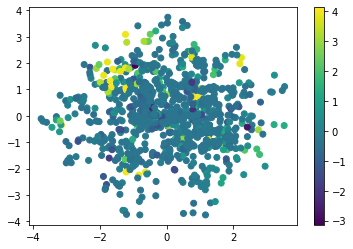

In [60]:
from matplotlib import pyplot as plt
z = vae.f_xz(x).rsample().detach().numpy()
plt.scatter(
    z[:, 0],
    z[:, 1],
    c=y,
)
plt.colorbar()

In [63]:
optimizer = torch.optim.Adam(vae_big.parameters(), 1e-3)

for _ in range(10000):
    optimizer.zero_grad()
    loss = vae_big.get_loss(x)
    print(loss)
    loss.backward()
    optimizer.step()
    

tensor(112680.6250, grad_fn=<NegBackward>)
tensor(110677.9297, grad_fn=<NegBackward>)
tensor(108833.3516, grad_fn=<NegBackward>)
tensor(107160.1406, grad_fn=<NegBackward>)
tensor(105514.9531, grad_fn=<NegBackward>)
tensor(103821.1562, grad_fn=<NegBackward>)
tensor(102110.2656, grad_fn=<NegBackward>)
tensor(100491.4062, grad_fn=<NegBackward>)
tensor(98702.8281, grad_fn=<NegBackward>)
tensor(96829.7969, grad_fn=<NegBackward>)
tensor(94967.9688, grad_fn=<NegBackward>)
tensor(92955.7266, grad_fn=<NegBackward>)
tensor(91146.9062, grad_fn=<NegBackward>)
tensor(89378.7031, grad_fn=<NegBackward>)
tensor(87490.8594, grad_fn=<NegBackward>)
tensor(85743.4375, grad_fn=<NegBackward>)
tensor(84006.7734, grad_fn=<NegBackward>)
tensor(82293.3281, grad_fn=<NegBackward>)
tensor(80729.6875, grad_fn=<NegBackward>)
tensor(78839.5078, grad_fn=<NegBackward>)
tensor(77415.5469, grad_fn=<NegBackward>)
tensor(75718.2344, grad_fn=<NegBackward>)
tensor(74463.2500, grad_fn=<NegBackward>)
tensor(73087.0859, grad_fn

tensor(41373.2734, grad_fn=<NegBackward>)
tensor(41307.2969, grad_fn=<NegBackward>)
tensor(41274.9688, grad_fn=<NegBackward>)
tensor(41385.6250, grad_fn=<NegBackward>)
tensor(41402.3438, grad_fn=<NegBackward>)
tensor(41217.3008, grad_fn=<NegBackward>)
tensor(41191.0625, grad_fn=<NegBackward>)
tensor(41090.4375, grad_fn=<NegBackward>)
tensor(40958.8516, grad_fn=<NegBackward>)
tensor(41042.2422, grad_fn=<NegBackward>)
tensor(40910.0938, grad_fn=<NegBackward>)
tensor(40939.7500, grad_fn=<NegBackward>)
tensor(40860.0625, grad_fn=<NegBackward>)
tensor(40846.6016, grad_fn=<NegBackward>)
tensor(40667.9375, grad_fn=<NegBackward>)
tensor(40765.7812, grad_fn=<NegBackward>)
tensor(40582.5938, grad_fn=<NegBackward>)
tensor(40528.2500, grad_fn=<NegBackward>)
tensor(40414.4844, grad_fn=<NegBackward>)
tensor(40408.5391, grad_fn=<NegBackward>)
tensor(40326.5156, grad_fn=<NegBackward>)
tensor(40376.0156, grad_fn=<NegBackward>)
tensor(40310.2109, grad_fn=<NegBackward>)
tensor(40263.0078, grad_fn=<NegBac

tensor(33788.8438, grad_fn=<NegBackward>)
tensor(33936.9570, grad_fn=<NegBackward>)
tensor(33928.8594, grad_fn=<NegBackward>)
tensor(33734.4531, grad_fn=<NegBackward>)
tensor(33690.3008, grad_fn=<NegBackward>)
tensor(33780.2109, grad_fn=<NegBackward>)
tensor(33523.6562, grad_fn=<NegBackward>)
tensor(33627.5508, grad_fn=<NegBackward>)
tensor(33731.7891, grad_fn=<NegBackward>)
tensor(33727.7812, grad_fn=<NegBackward>)
tensor(33715.8672, grad_fn=<NegBackward>)
tensor(33593.5156, grad_fn=<NegBackward>)
tensor(33593.9141, grad_fn=<NegBackward>)
tensor(33647.5391, grad_fn=<NegBackward>)
tensor(33687.6328, grad_fn=<NegBackward>)
tensor(33623.9766, grad_fn=<NegBackward>)
tensor(33554.5703, grad_fn=<NegBackward>)
tensor(33484.4805, grad_fn=<NegBackward>)
tensor(33562.4297, grad_fn=<NegBackward>)
tensor(33482.5859, grad_fn=<NegBackward>)
tensor(33399.8672, grad_fn=<NegBackward>)
tensor(33340.5703, grad_fn=<NegBackward>)
tensor(33388.3750, grad_fn=<NegBackward>)
tensor(33268.6055, grad_fn=<NegBac

tensor(30373.2402, grad_fn=<NegBackward>)
tensor(30323.6113, grad_fn=<NegBackward>)
tensor(30448.7988, grad_fn=<NegBackward>)
tensor(30410.5117, grad_fn=<NegBackward>)
tensor(30409.6582, grad_fn=<NegBackward>)
tensor(30268.1484, grad_fn=<NegBackward>)
tensor(30347.1602, grad_fn=<NegBackward>)
tensor(30250.2676, grad_fn=<NegBackward>)
tensor(30224.6855, grad_fn=<NegBackward>)
tensor(30213.5527, grad_fn=<NegBackward>)
tensor(30127.1035, grad_fn=<NegBackward>)
tensor(30240.4805, grad_fn=<NegBackward>)
tensor(30251.9219, grad_fn=<NegBackward>)
tensor(30277.9297, grad_fn=<NegBackward>)
tensor(30298.0840, grad_fn=<NegBackward>)
tensor(30196.3945, grad_fn=<NegBackward>)
tensor(30057.2793, grad_fn=<NegBackward>)
tensor(30084.4941, grad_fn=<NegBackward>)
tensor(30089.9043, grad_fn=<NegBackward>)
tensor(30062.3613, grad_fn=<NegBackward>)
tensor(30122.6484, grad_fn=<NegBackward>)
tensor(30073.0723, grad_fn=<NegBackward>)
tensor(30031.0586, grad_fn=<NegBackward>)
tensor(30182.2285, grad_fn=<NegBac

tensor(28095.0059, grad_fn=<NegBackward>)
tensor(28113.9688, grad_fn=<NegBackward>)
tensor(28178.5117, grad_fn=<NegBackward>)
tensor(28156.3203, grad_fn=<NegBackward>)
tensor(28125.3184, grad_fn=<NegBackward>)
tensor(28107.4727, grad_fn=<NegBackward>)
tensor(28189.8555, grad_fn=<NegBackward>)
tensor(28047.0703, grad_fn=<NegBackward>)
tensor(28161.1738, grad_fn=<NegBackward>)
tensor(28150.4160, grad_fn=<NegBackward>)
tensor(28072.1191, grad_fn=<NegBackward>)
tensor(28244.6621, grad_fn=<NegBackward>)
tensor(28077.6035, grad_fn=<NegBackward>)
tensor(28033.4668, grad_fn=<NegBackward>)
tensor(28045.2910, grad_fn=<NegBackward>)
tensor(28087.5156, grad_fn=<NegBackward>)
tensor(28119.4297, grad_fn=<NegBackward>)
tensor(27984.9590, grad_fn=<NegBackward>)
tensor(28014.6387, grad_fn=<NegBackward>)
tensor(28020.0215, grad_fn=<NegBackward>)
tensor(27866.2715, grad_fn=<NegBackward>)
tensor(28062.3535, grad_fn=<NegBackward>)
tensor(28076.2109, grad_fn=<NegBackward>)
tensor(28009.3887, grad_fn=<NegBac

tensor(26588.6973, grad_fn=<NegBackward>)
tensor(26739.7090, grad_fn=<NegBackward>)
tensor(26760.5352, grad_fn=<NegBackward>)
tensor(26753.8906, grad_fn=<NegBackward>)
tensor(26713.7930, grad_fn=<NegBackward>)
tensor(26606.4180, grad_fn=<NegBackward>)
tensor(26686.1641, grad_fn=<NegBackward>)
tensor(26713.0723, grad_fn=<NegBackward>)
tensor(26665.0820, grad_fn=<NegBackward>)
tensor(26505.0781, grad_fn=<NegBackward>)
tensor(26682.3652, grad_fn=<NegBackward>)
tensor(26610.4844, grad_fn=<NegBackward>)
tensor(26506.3320, grad_fn=<NegBackward>)
tensor(26563.7031, grad_fn=<NegBackward>)
tensor(26639.2969, grad_fn=<NegBackward>)
tensor(26488.1621, grad_fn=<NegBackward>)
tensor(26632.6172, grad_fn=<NegBackward>)
tensor(26484.7207, grad_fn=<NegBackward>)
tensor(26516.0508, grad_fn=<NegBackward>)
tensor(26572.8438, grad_fn=<NegBackward>)
tensor(26682.0195, grad_fn=<NegBackward>)
tensor(26564.9609, grad_fn=<NegBackward>)
tensor(26537.6016, grad_fn=<NegBackward>)
tensor(26604.5957, grad_fn=<NegBac

tensor(25496.7305, grad_fn=<NegBackward>)
tensor(25644.3516, grad_fn=<NegBackward>)
tensor(25588.4277, grad_fn=<NegBackward>)
tensor(25579.0098, grad_fn=<NegBackward>)
tensor(25519.7285, grad_fn=<NegBackward>)
tensor(25721.0469, grad_fn=<NegBackward>)
tensor(25506., grad_fn=<NegBackward>)
tensor(25543.0156, grad_fn=<NegBackward>)
tensor(25524.3574, grad_fn=<NegBackward>)
tensor(25675.6211, grad_fn=<NegBackward>)
tensor(25548.3496, grad_fn=<NegBackward>)
tensor(25529.9043, grad_fn=<NegBackward>)
tensor(25495.2227, grad_fn=<NegBackward>)
tensor(25460.0898, grad_fn=<NegBackward>)
tensor(25671.6582, grad_fn=<NegBackward>)
tensor(25560.5664, grad_fn=<NegBackward>)
tensor(25444.6797, grad_fn=<NegBackward>)
tensor(25389.1602, grad_fn=<NegBackward>)
tensor(25576.7969, grad_fn=<NegBackward>)
tensor(25408.0781, grad_fn=<NegBackward>)
tensor(25499.2812, grad_fn=<NegBackward>)
tensor(25491.2637, grad_fn=<NegBackward>)
tensor(25344.1094, grad_fn=<NegBackward>)
tensor(25457.8379, grad_fn=<NegBackwar

tensor(24695.9258, grad_fn=<NegBackward>)
tensor(24688.9355, grad_fn=<NegBackward>)
tensor(24772., grad_fn=<NegBackward>)
tensor(24599.4805, grad_fn=<NegBackward>)
tensor(24689.3008, grad_fn=<NegBackward>)
tensor(24631.7129, grad_fn=<NegBackward>)
tensor(24687.2969, grad_fn=<NegBackward>)
tensor(24703.7930, grad_fn=<NegBackward>)
tensor(24676.9141, grad_fn=<NegBackward>)
tensor(24690.6016, grad_fn=<NegBackward>)
tensor(24701.4648, grad_fn=<NegBackward>)
tensor(24647.8906, grad_fn=<NegBackward>)
tensor(24629.6074, grad_fn=<NegBackward>)
tensor(24617.0293, grad_fn=<NegBackward>)
tensor(24730.2930, grad_fn=<NegBackward>)
tensor(24609.8438, grad_fn=<NegBackward>)
tensor(24446.1680, grad_fn=<NegBackward>)
tensor(24545.9844, grad_fn=<NegBackward>)
tensor(24659.7148, grad_fn=<NegBackward>)
tensor(24713.7734, grad_fn=<NegBackward>)
tensor(24543.3516, grad_fn=<NegBackward>)
tensor(24758.6445, grad_fn=<NegBackward>)
tensor(24606.4180, grad_fn=<NegBackward>)
tensor(24512.9805, grad_fn=<NegBackwar

tensor(23947.6660, grad_fn=<NegBackward>)
tensor(23888.8828, grad_fn=<NegBackward>)
tensor(24197.0488, grad_fn=<NegBackward>)
tensor(23912.3574, grad_fn=<NegBackward>)
tensor(23875.1680, grad_fn=<NegBackward>)
tensor(24002.6543, grad_fn=<NegBackward>)
tensor(23887.5742, grad_fn=<NegBackward>)
tensor(24003.1094, grad_fn=<NegBackward>)
tensor(24075.8672, grad_fn=<NegBackward>)
tensor(23968.8555, grad_fn=<NegBackward>)
tensor(24051.1680, grad_fn=<NegBackward>)
tensor(24060.2148, grad_fn=<NegBackward>)
tensor(23984.4805, grad_fn=<NegBackward>)
tensor(23926.6562, grad_fn=<NegBackward>)
tensor(24014.6289, grad_fn=<NegBackward>)
tensor(24067.5059, grad_fn=<NegBackward>)
tensor(24009.3906, grad_fn=<NegBackward>)
tensor(23948.0469, grad_fn=<NegBackward>)
tensor(24085.9980, grad_fn=<NegBackward>)
tensor(23918.0352, grad_fn=<NegBackward>)
tensor(23896.1484, grad_fn=<NegBackward>)
tensor(23957.1504, grad_fn=<NegBackward>)
tensor(23855.0508, grad_fn=<NegBackward>)
tensor(23900.2676, grad_fn=<NegBac

tensor(23408.9668, grad_fn=<NegBackward>)
tensor(23520.8047, grad_fn=<NegBackward>)
tensor(23366.7148, grad_fn=<NegBackward>)
tensor(23668.8555, grad_fn=<NegBackward>)
tensor(23458.2734, grad_fn=<NegBackward>)
tensor(23576.7012, grad_fn=<NegBackward>)
tensor(23538.9043, grad_fn=<NegBackward>)
tensor(23566.1484, grad_fn=<NegBackward>)
tensor(23376.6094, grad_fn=<NegBackward>)
tensor(23606.3984, grad_fn=<NegBackward>)
tensor(23517.4062, grad_fn=<NegBackward>)
tensor(23407.5625, grad_fn=<NegBackward>)
tensor(23550.3672, grad_fn=<NegBackward>)
tensor(23452.9258, grad_fn=<NegBackward>)
tensor(23501.2695, grad_fn=<NegBackward>)
tensor(23615.3984, grad_fn=<NegBackward>)
tensor(23484.9395, grad_fn=<NegBackward>)
tensor(23668.9180, grad_fn=<NegBackward>)
tensor(23449.7422, grad_fn=<NegBackward>)
tensor(23422.0742, grad_fn=<NegBackward>)
tensor(23437.0508, grad_fn=<NegBackward>)
tensor(23378.7754, grad_fn=<NegBackward>)
tensor(23301., grad_fn=<NegBackward>)
tensor(23453.8203, grad_fn=<NegBackwar

tensor(23054.5449, grad_fn=<NegBackward>)
tensor(23141.6934, grad_fn=<NegBackward>)
tensor(22983.5645, grad_fn=<NegBackward>)
tensor(23021.9062, grad_fn=<NegBackward>)
tensor(22966.9805, grad_fn=<NegBackward>)
tensor(22931.9883, grad_fn=<NegBackward>)
tensor(22972.2773, grad_fn=<NegBackward>)
tensor(23051.9551, grad_fn=<NegBackward>)
tensor(22939.9766, grad_fn=<NegBackward>)
tensor(22876.6992, grad_fn=<NegBackward>)
tensor(23146.0430, grad_fn=<NegBackward>)
tensor(23068.7500, grad_fn=<NegBackward>)
tensor(23002.1309, grad_fn=<NegBackward>)
tensor(22890.5625, grad_fn=<NegBackward>)
tensor(23105.9219, grad_fn=<NegBackward>)
tensor(23045.9141, grad_fn=<NegBackward>)
tensor(22987.7207, grad_fn=<NegBackward>)
tensor(22988.2012, grad_fn=<NegBackward>)
tensor(23065.0664, grad_fn=<NegBackward>)
tensor(23053.5742, grad_fn=<NegBackward>)
tensor(23012.3594, grad_fn=<NegBackward>)
tensor(23053.6973, grad_fn=<NegBackward>)
tensor(23113.3281, grad_fn=<NegBackward>)
tensor(23002.9922, grad_fn=<NegBac

tensor(22605.7754, grad_fn=<NegBackward>)
tensor(22624.7266, grad_fn=<NegBackward>)
tensor(22645.0312, grad_fn=<NegBackward>)
tensor(22746.3633, grad_fn=<NegBackward>)
tensor(22731.8750, grad_fn=<NegBackward>)
tensor(22676.8281, grad_fn=<NegBackward>)
tensor(22705.5098, grad_fn=<NegBackward>)
tensor(22610.2441, grad_fn=<NegBackward>)
tensor(22767.8477, grad_fn=<NegBackward>)
tensor(22795.1191, grad_fn=<NegBackward>)
tensor(22739.0586, grad_fn=<NegBackward>)
tensor(22677.4082, grad_fn=<NegBackward>)
tensor(22632.3008, grad_fn=<NegBackward>)
tensor(22619.9336, grad_fn=<NegBackward>)
tensor(22683.5391, grad_fn=<NegBackward>)
tensor(22557.6113, grad_fn=<NegBackward>)
tensor(22693.0117, grad_fn=<NegBackward>)
tensor(22702.0625, grad_fn=<NegBackward>)
tensor(22706.8242, grad_fn=<NegBackward>)
tensor(22628.6836, grad_fn=<NegBackward>)
tensor(22641.4805, grad_fn=<NegBackward>)
tensor(22669.0859, grad_fn=<NegBackward>)
tensor(22648.3730, grad_fn=<NegBackward>)
tensor(22628.3750, grad_fn=<NegBac

tensor(22218.2207, grad_fn=<NegBackward>)
tensor(22302.8164, grad_fn=<NegBackward>)
tensor(22389.7070, grad_fn=<NegBackward>)
tensor(22331.5273, grad_fn=<NegBackward>)
tensor(22372.9062, grad_fn=<NegBackward>)
tensor(22389.4336, grad_fn=<NegBackward>)
tensor(22432.4961, grad_fn=<NegBackward>)
tensor(22300.7324, grad_fn=<NegBackward>)
tensor(22429.9922, grad_fn=<NegBackward>)
tensor(22353.7852, grad_fn=<NegBackward>)
tensor(22294.7812, grad_fn=<NegBackward>)
tensor(22409.4004, grad_fn=<NegBackward>)
tensor(22354.3164, grad_fn=<NegBackward>)
tensor(22508.5820, grad_fn=<NegBackward>)
tensor(22479.1621, grad_fn=<NegBackward>)
tensor(22472.8613, grad_fn=<NegBackward>)
tensor(22360.9238, grad_fn=<NegBackward>)
tensor(22342.8672, grad_fn=<NegBackward>)
tensor(22293.2031, grad_fn=<NegBackward>)
tensor(22299.0527, grad_fn=<NegBackward>)
tensor(22424., grad_fn=<NegBackward>)
tensor(22303.6367, grad_fn=<NegBackward>)
tensor(22380.1055, grad_fn=<NegBackward>)
tensor(22371.3125, grad_fn=<NegBackwar

tensor(22151.8164, grad_fn=<NegBackward>)
tensor(22048.0391, grad_fn=<NegBackward>)
tensor(22003.1562, grad_fn=<NegBackward>)
tensor(22174.7383, grad_fn=<NegBackward>)
tensor(22165.8789, grad_fn=<NegBackward>)
tensor(22004.3496, grad_fn=<NegBackward>)
tensor(21970.3652, grad_fn=<NegBackward>)
tensor(22109.2070, grad_fn=<NegBackward>)
tensor(22069.9844, grad_fn=<NegBackward>)
tensor(21994.0508, grad_fn=<NegBackward>)
tensor(22030.5195, grad_fn=<NegBackward>)
tensor(22077.1328, grad_fn=<NegBackward>)
tensor(22091.3984, grad_fn=<NegBackward>)
tensor(21940.5605, grad_fn=<NegBackward>)
tensor(22061.8320, grad_fn=<NegBackward>)
tensor(22107.8477, grad_fn=<NegBackward>)
tensor(22128.8477, grad_fn=<NegBackward>)
tensor(22158.3340, grad_fn=<NegBackward>)
tensor(22092.0312, grad_fn=<NegBackward>)
tensor(22109.3008, grad_fn=<NegBackward>)
tensor(22047.1055, grad_fn=<NegBackward>)
tensor(22048.5938, grad_fn=<NegBackward>)
tensor(22126.5938, grad_fn=<NegBackward>)
tensor(22093.5801, grad_fn=<NegBac

tensor(21908.4531, grad_fn=<NegBackward>)
tensor(21894.9375, grad_fn=<NegBackward>)
tensor(21879.5059, grad_fn=<NegBackward>)
tensor(21809.4785, grad_fn=<NegBackward>)
tensor(21785.4082, grad_fn=<NegBackward>)
tensor(21862.0156, grad_fn=<NegBackward>)
tensor(21885.1582, grad_fn=<NegBackward>)
tensor(21864.0801, grad_fn=<NegBackward>)
tensor(21784.8398, grad_fn=<NegBackward>)
tensor(21830.5430, grad_fn=<NegBackward>)
tensor(21812.5234, grad_fn=<NegBackward>)
tensor(21879.2441, grad_fn=<NegBackward>)
tensor(21941.9961, grad_fn=<NegBackward>)
tensor(21789.9258, grad_fn=<NegBackward>)
tensor(21738.2227, grad_fn=<NegBackward>)
tensor(21847.6250, grad_fn=<NegBackward>)
tensor(21819.9590, grad_fn=<NegBackward>)
tensor(21989.9102, grad_fn=<NegBackward>)
tensor(21844.8457, grad_fn=<NegBackward>)
tensor(21818.0195, grad_fn=<NegBackward>)
tensor(21821.5781, grad_fn=<NegBackward>)
tensor(21766.3203, grad_fn=<NegBackward>)
tensor(21773.5742, grad_fn=<NegBackward>)
tensor(21832.5430, grad_fn=<NegBac

tensor(21713.0742, grad_fn=<NegBackward>)
tensor(21735.0957, grad_fn=<NegBackward>)
tensor(21577.1660, grad_fn=<NegBackward>)
tensor(21604.0723, grad_fn=<NegBackward>)
tensor(21739.8281, grad_fn=<NegBackward>)
tensor(21669.5215, grad_fn=<NegBackward>)
tensor(21674.5410, grad_fn=<NegBackward>)
tensor(21547.1211, grad_fn=<NegBackward>)
tensor(21648.8984, grad_fn=<NegBackward>)
tensor(21636.1152, grad_fn=<NegBackward>)
tensor(21543.5352, grad_fn=<NegBackward>)
tensor(21629.7617, grad_fn=<NegBackward>)
tensor(21691.1641, grad_fn=<NegBackward>)
tensor(21774.6523, grad_fn=<NegBackward>)
tensor(21642.6855, grad_fn=<NegBackward>)
tensor(21620.7363, grad_fn=<NegBackward>)
tensor(21526.6543, grad_fn=<NegBackward>)
tensor(21425.1523, grad_fn=<NegBackward>)
tensor(21578.8438, grad_fn=<NegBackward>)
tensor(21651.3457, grad_fn=<NegBackward>)
tensor(21632.3906, grad_fn=<NegBackward>)
tensor(21533.3164, grad_fn=<NegBackward>)
tensor(21625.0938, grad_fn=<NegBackward>)
tensor(21549.9902, grad_fn=<NegBac

tensor(21550.6309, grad_fn=<NegBackward>)
tensor(21458.3262, grad_fn=<NegBackward>)
tensor(21470.9883, grad_fn=<NegBackward>)
tensor(21358.9258, grad_fn=<NegBackward>)
tensor(21441.1973, grad_fn=<NegBackward>)
tensor(21516.9844, grad_fn=<NegBackward>)
tensor(21365.8594, grad_fn=<NegBackward>)
tensor(21523.6211, grad_fn=<NegBackward>)
tensor(21386.3809, grad_fn=<NegBackward>)
tensor(21569.1367, grad_fn=<NegBackward>)
tensor(21582.8633, grad_fn=<NegBackward>)
tensor(21533.9941, grad_fn=<NegBackward>)
tensor(21482.7539, grad_fn=<NegBackward>)
tensor(21545.6523, grad_fn=<NegBackward>)
tensor(21514.8906, grad_fn=<NegBackward>)
tensor(21467.5449, grad_fn=<NegBackward>)
tensor(21548.6094, grad_fn=<NegBackward>)
tensor(21528.8965, grad_fn=<NegBackward>)
tensor(21528.0078, grad_fn=<NegBackward>)
tensor(21355.4414, grad_fn=<NegBackward>)
tensor(21559.2930, grad_fn=<NegBackward>)
tensor(21478.2812, grad_fn=<NegBackward>)
tensor(21468.6465, grad_fn=<NegBackward>)
tensor(21471.2090, grad_fn=<NegBac

tensor(21378.6699, grad_fn=<NegBackward>)
tensor(21332.8105, grad_fn=<NegBackward>)
tensor(21311.3105, grad_fn=<NegBackward>)
tensor(21294.1250, grad_fn=<NegBackward>)
tensor(21415.7617, grad_fn=<NegBackward>)
tensor(21267.3320, grad_fn=<NegBackward>)
tensor(21435.8047, grad_fn=<NegBackward>)
tensor(21292.5762, grad_fn=<NegBackward>)
tensor(21145.0234, grad_fn=<NegBackward>)
tensor(21308.9727, grad_fn=<NegBackward>)
tensor(21262.0410, grad_fn=<NegBackward>)
tensor(21227.2969, grad_fn=<NegBackward>)
tensor(21210.2461, grad_fn=<NegBackward>)
tensor(21176.8926, grad_fn=<NegBackward>)
tensor(21287.9199, grad_fn=<NegBackward>)
tensor(21346.5254, grad_fn=<NegBackward>)
tensor(21286.7168, grad_fn=<NegBackward>)
tensor(21240.3457, grad_fn=<NegBackward>)
tensor(21308.8848, grad_fn=<NegBackward>)
tensor(21298.5117, grad_fn=<NegBackward>)
tensor(21351.8633, grad_fn=<NegBackward>)
tensor(21222.0352, grad_fn=<NegBackward>)
tensor(21279.4551, grad_fn=<NegBackward>)
tensor(21291.9219, grad_fn=<NegBac

tensor(21215.0273, grad_fn=<NegBackward>)
tensor(21074.5059, grad_fn=<NegBackward>)
tensor(21092.9004, grad_fn=<NegBackward>)
tensor(21118.5898, grad_fn=<NegBackward>)
tensor(21200.7793, grad_fn=<NegBackward>)
tensor(21157.6602, grad_fn=<NegBackward>)
tensor(21209.6660, grad_fn=<NegBackward>)
tensor(21090.2285, grad_fn=<NegBackward>)
tensor(21155.0293, grad_fn=<NegBackward>)
tensor(21139.7031, grad_fn=<NegBackward>)
tensor(21167.3711, grad_fn=<NegBackward>)
tensor(21046.9277, grad_fn=<NegBackward>)
tensor(21053.3867, grad_fn=<NegBackward>)
tensor(21067.6504, grad_fn=<NegBackward>)
tensor(21012.5664, grad_fn=<NegBackward>)
tensor(21200.7285, grad_fn=<NegBackward>)
tensor(21250.9180, grad_fn=<NegBackward>)
tensor(21186.9043, grad_fn=<NegBackward>)
tensor(21152.1816, grad_fn=<NegBackward>)
tensor(21175.2578, grad_fn=<NegBackward>)
tensor(21304.7266, grad_fn=<NegBackward>)
tensor(21208.3105, grad_fn=<NegBackward>)
tensor(21093.2344, grad_fn=<NegBackward>)
tensor(21071.5312, grad_fn=<NegBac

tensor(20859.2734, grad_fn=<NegBackward>)
tensor(21096.1777, grad_fn=<NegBackward>)
tensor(21001.2695, grad_fn=<NegBackward>)
tensor(20983.6309, grad_fn=<NegBackward>)
tensor(20981.6250, grad_fn=<NegBackward>)
tensor(21074.0762, grad_fn=<NegBackward>)
tensor(21000.4648, grad_fn=<NegBackward>)
tensor(21177.6836, grad_fn=<NegBackward>)
tensor(21089.9180, grad_fn=<NegBackward>)
tensor(20946.2305, grad_fn=<NegBackward>)
tensor(20997.7461, grad_fn=<NegBackward>)
tensor(20964.3203, grad_fn=<NegBackward>)
tensor(21007.8184, grad_fn=<NegBackward>)
tensor(20914.3516, grad_fn=<NegBackward>)
tensor(21033.1875, grad_fn=<NegBackward>)
tensor(21172.5664, grad_fn=<NegBackward>)
tensor(20981.7070, grad_fn=<NegBackward>)
tensor(20875.5684, grad_fn=<NegBackward>)
tensor(21206.4570, grad_fn=<NegBackward>)
tensor(21041.0273, grad_fn=<NegBackward>)
tensor(20845.3691, grad_fn=<NegBackward>)
tensor(20939.8223, grad_fn=<NegBackward>)
tensor(21052.3438, grad_fn=<NegBackward>)
tensor(20965.6719, grad_fn=<NegBac

tensor(20828.4141, grad_fn=<NegBackward>)
tensor(20830.6953, grad_fn=<NegBackward>)
tensor(20837.8320, grad_fn=<NegBackward>)
tensor(20844.0430, grad_fn=<NegBackward>)
tensor(20864.4375, grad_fn=<NegBackward>)
tensor(20874.4199, grad_fn=<NegBackward>)
tensor(20851.0078, grad_fn=<NegBackward>)
tensor(20738.8555, grad_fn=<NegBackward>)
tensor(20775.1719, grad_fn=<NegBackward>)
tensor(20919.1680, grad_fn=<NegBackward>)
tensor(20790.9570, grad_fn=<NegBackward>)
tensor(20885.4062, grad_fn=<NegBackward>)
tensor(20997.9238, grad_fn=<NegBackward>)
tensor(20793.8125, grad_fn=<NegBackward>)
tensor(20778.2461, grad_fn=<NegBackward>)
tensor(20933.1367, grad_fn=<NegBackward>)
tensor(20890.0898, grad_fn=<NegBackward>)
tensor(20728.8359, grad_fn=<NegBackward>)
tensor(20752.2383, grad_fn=<NegBackward>)
tensor(20728.6797, grad_fn=<NegBackward>)
tensor(20902.3047, grad_fn=<NegBackward>)
tensor(20882.0254, grad_fn=<NegBackward>)
tensor(20944.8906, grad_fn=<NegBackward>)
tensor(20818.1211, grad_fn=<NegBac

tensor(20721.3203, grad_fn=<NegBackward>)
tensor(20656.5820, grad_fn=<NegBackward>)
tensor(20701.7910, grad_fn=<NegBackward>)
tensor(20648.6250, grad_fn=<NegBackward>)
tensor(20798.0215, grad_fn=<NegBackward>)
tensor(20790.1270, grad_fn=<NegBackward>)
tensor(20821.9102, grad_fn=<NegBackward>)
tensor(20854.8203, grad_fn=<NegBackward>)
tensor(20809.2852, grad_fn=<NegBackward>)
tensor(20846.0332, grad_fn=<NegBackward>)
tensor(20719.6973, grad_fn=<NegBackward>)
tensor(20693.4961, grad_fn=<NegBackward>)
tensor(20797.5078, grad_fn=<NegBackward>)
tensor(20833.5156, grad_fn=<NegBackward>)
tensor(20828.0938, grad_fn=<NegBackward>)
tensor(20700.1523, grad_fn=<NegBackward>)
tensor(20769.4551, grad_fn=<NegBackward>)
tensor(20770.8047, grad_fn=<NegBackward>)
tensor(20839.1445, grad_fn=<NegBackward>)
tensor(20844.4434, grad_fn=<NegBackward>)
tensor(20790.2656, grad_fn=<NegBackward>)
tensor(20816.5625, grad_fn=<NegBackward>)
tensor(20751.8555, grad_fn=<NegBackward>)
tensor(20681.1172, grad_fn=<NegBac

tensor(20737.6836, grad_fn=<NegBackward>)
tensor(20528.8418, grad_fn=<NegBackward>)
tensor(20665.9141, grad_fn=<NegBackward>)
tensor(20682.8242, grad_fn=<NegBackward>)
tensor(20693.0156, grad_fn=<NegBackward>)
tensor(20666.6484, grad_fn=<NegBackward>)
tensor(20602.3145, grad_fn=<NegBackward>)
tensor(20621.0820, grad_fn=<NegBackward>)
tensor(20711.5352, grad_fn=<NegBackward>)
tensor(20742.3359, grad_fn=<NegBackward>)
tensor(20663.3926, grad_fn=<NegBackward>)
tensor(20544.2617, grad_fn=<NegBackward>)
tensor(20619.1777, grad_fn=<NegBackward>)
tensor(20757.4785, grad_fn=<NegBackward>)
tensor(20620.6523, grad_fn=<NegBackward>)
tensor(20627.8652, grad_fn=<NegBackward>)
tensor(20715.9766, grad_fn=<NegBackward>)
tensor(20499.8672, grad_fn=<NegBackward>)
tensor(20651.7344, grad_fn=<NegBackward>)
tensor(20672.3965, grad_fn=<NegBackward>)
tensor(20691.4414, grad_fn=<NegBackward>)
tensor(20546.2461, grad_fn=<NegBackward>)
tensor(20558.3066, grad_fn=<NegBackward>)
tensor(20746.6875, grad_fn=<NegBac

tensor(20626.9531, grad_fn=<NegBackward>)
tensor(20507.8945, grad_fn=<NegBackward>)
tensor(20619.9102, grad_fn=<NegBackward>)
tensor(20481.9258, grad_fn=<NegBackward>)
tensor(20584.3086, grad_fn=<NegBackward>)
tensor(20542.9414, grad_fn=<NegBackward>)
tensor(20487.7988, grad_fn=<NegBackward>)
tensor(20447.5352, grad_fn=<NegBackward>)
tensor(20583.7754, grad_fn=<NegBackward>)
tensor(20567.8145, grad_fn=<NegBackward>)
tensor(20539.1289, grad_fn=<NegBackward>)
tensor(20534.6152, grad_fn=<NegBackward>)
tensor(20574.4805, grad_fn=<NegBackward>)
tensor(20544.8262, grad_fn=<NegBackward>)
tensor(20502.2500, grad_fn=<NegBackward>)
tensor(20421.4492, grad_fn=<NegBackward>)
tensor(20577.6055, grad_fn=<NegBackward>)
tensor(20559.9883, grad_fn=<NegBackward>)
tensor(20531.3379, grad_fn=<NegBackward>)
tensor(20478.3027, grad_fn=<NegBackward>)
tensor(20631.5684, grad_fn=<NegBackward>)
tensor(20527.3496, grad_fn=<NegBackward>)
tensor(20635.2969, grad_fn=<NegBackward>)
tensor(20626.6699, grad_fn=<NegBac

tensor(20549.8750, grad_fn=<NegBackward>)
tensor(20561.0625, grad_fn=<NegBackward>)
tensor(20501.8555, grad_fn=<NegBackward>)
tensor(20545.0234, grad_fn=<NegBackward>)
tensor(20373.3789, grad_fn=<NegBackward>)
tensor(20463.8516, grad_fn=<NegBackward>)
tensor(20543.6250, grad_fn=<NegBackward>)
tensor(20479.6133, grad_fn=<NegBackward>)
tensor(20380.9922, grad_fn=<NegBackward>)
tensor(20476.8105, grad_fn=<NegBackward>)
tensor(20407.6641, grad_fn=<NegBackward>)
tensor(20505.8867, grad_fn=<NegBackward>)
tensor(20447.2480, grad_fn=<NegBackward>)
tensor(20381.7168, grad_fn=<NegBackward>)
tensor(20464.4492, grad_fn=<NegBackward>)
tensor(20436.8516, grad_fn=<NegBackward>)
tensor(20463.2656, grad_fn=<NegBackward>)
tensor(20499.2305, grad_fn=<NegBackward>)
tensor(20440.0430, grad_fn=<NegBackward>)
tensor(20390.3574, grad_fn=<NegBackward>)
tensor(20546.8594, grad_fn=<NegBackward>)
tensor(20292.6289, grad_fn=<NegBackward>)
tensor(20414.8320, grad_fn=<NegBackward>)
tensor(20524.9336, grad_fn=<NegBac

tensor(20282.0410, grad_fn=<NegBackward>)
tensor(20434.9531, grad_fn=<NegBackward>)
tensor(20487.8555, grad_fn=<NegBackward>)
tensor(20468.7285, grad_fn=<NegBackward>)
tensor(20350.0742, grad_fn=<NegBackward>)
tensor(20442.7266, grad_fn=<NegBackward>)
tensor(20324.0918, grad_fn=<NegBackward>)
tensor(20447.9180, grad_fn=<NegBackward>)
tensor(20469.9004, grad_fn=<NegBackward>)
tensor(20642.5820, grad_fn=<NegBackward>)
tensor(20440.7129, grad_fn=<NegBackward>)
tensor(20356.2578, grad_fn=<NegBackward>)
tensor(20397.3711, grad_fn=<NegBackward>)
tensor(20479.4453, grad_fn=<NegBackward>)
tensor(20266.2188, grad_fn=<NegBackward>)
tensor(20379.8828, grad_fn=<NegBackward>)
tensor(20530.0527, grad_fn=<NegBackward>)
tensor(20390.3887, grad_fn=<NegBackward>)
tensor(20479.8438, grad_fn=<NegBackward>)
tensor(20327.9668, grad_fn=<NegBackward>)
tensor(20279.7441, grad_fn=<NegBackward>)
tensor(20468.4473, grad_fn=<NegBackward>)
tensor(20329.5352, grad_fn=<NegBackward>)
tensor(20439.3027, grad_fn=<NegBac

tensor(20258.3242, grad_fn=<NegBackward>)
tensor(20237.1699, grad_fn=<NegBackward>)
tensor(20400.8223, grad_fn=<NegBackward>)
tensor(20240.0078, grad_fn=<NegBackward>)
tensor(20248.9961, grad_fn=<NegBackward>)
tensor(20294.3047, grad_fn=<NegBackward>)
tensor(20280.0371, grad_fn=<NegBackward>)
tensor(20326.2656, grad_fn=<NegBackward>)
tensor(20389.3027, grad_fn=<NegBackward>)
tensor(20251.4688, grad_fn=<NegBackward>)
tensor(20437.1309, grad_fn=<NegBackward>)
tensor(20333.2031, grad_fn=<NegBackward>)
tensor(20355.6758, grad_fn=<NegBackward>)
tensor(20262., grad_fn=<NegBackward>)
tensor(20407.0371, grad_fn=<NegBackward>)
tensor(20392.2500, grad_fn=<NegBackward>)
tensor(20321.1836, grad_fn=<NegBackward>)
tensor(20275.1562, grad_fn=<NegBackward>)
tensor(20332.6289, grad_fn=<NegBackward>)
tensor(20353.4199, grad_fn=<NegBackward>)
tensor(20261.3555, grad_fn=<NegBackward>)
tensor(20340.4805, grad_fn=<NegBackward>)
tensor(20228.2305, grad_fn=<NegBackward>)
tensor(20390.0938, grad_fn=<NegBackwar

tensor(20257.7344, grad_fn=<NegBackward>)
tensor(20124.5195, grad_fn=<NegBackward>)
tensor(20145.1992, grad_fn=<NegBackward>)
tensor(20399.9688, grad_fn=<NegBackward>)
tensor(20136.0449, grad_fn=<NegBackward>)
tensor(20207.5898, grad_fn=<NegBackward>)
tensor(20047.6270, grad_fn=<NegBackward>)
tensor(20321.7109, grad_fn=<NegBackward>)
tensor(20184.4180, grad_fn=<NegBackward>)
tensor(20152.1914, grad_fn=<NegBackward>)
tensor(20148.4668, grad_fn=<NegBackward>)
tensor(20153.0195, grad_fn=<NegBackward>)
tensor(20067.9902, grad_fn=<NegBackward>)
tensor(20214.2148, grad_fn=<NegBackward>)
tensor(20097.2598, grad_fn=<NegBackward>)
tensor(20232.2344, grad_fn=<NegBackward>)
tensor(20161.0234, grad_fn=<NegBackward>)
tensor(20193.8594, grad_fn=<NegBackward>)
tensor(20251.3496, grad_fn=<NegBackward>)
tensor(20221.9277, grad_fn=<NegBackward>)
tensor(20201.1562, grad_fn=<NegBackward>)
tensor(20258.2012, grad_fn=<NegBackward>)
tensor(20263.4004, grad_fn=<NegBackward>)
tensor(20200.1094, grad_fn=<NegBac

tensor(20162.7363, grad_fn=<NegBackward>)
tensor(20162.4824, grad_fn=<NegBackward>)
tensor(20059.5820, grad_fn=<NegBackward>)
tensor(20161.6855, grad_fn=<NegBackward>)
tensor(20118.8828, grad_fn=<NegBackward>)
tensor(20251.5801, grad_fn=<NegBackward>)
tensor(20127.1680, grad_fn=<NegBackward>)
tensor(20238.0234, grad_fn=<NegBackward>)
tensor(20174.5977, grad_fn=<NegBackward>)
tensor(20180.2891, grad_fn=<NegBackward>)
tensor(20178.5918, grad_fn=<NegBackward>)
tensor(20129.3926, grad_fn=<NegBackward>)
tensor(20172.3359, grad_fn=<NegBackward>)
tensor(20125.2266, grad_fn=<NegBackward>)
tensor(20142.4941, grad_fn=<NegBackward>)
tensor(20184.0781, grad_fn=<NegBackward>)
tensor(20094.3008, grad_fn=<NegBackward>)
tensor(20110.1387, grad_fn=<NegBackward>)
tensor(20103.6016, grad_fn=<NegBackward>)
tensor(20110.7500, grad_fn=<NegBackward>)
tensor(20060.0996, grad_fn=<NegBackward>)
tensor(20033.0957, grad_fn=<NegBackward>)
tensor(20171.0254, grad_fn=<NegBackward>)
tensor(20069.3418, grad_fn=<NegBac

tensor(19997.5234, grad_fn=<NegBackward>)
tensor(19933.7227, grad_fn=<NegBackward>)
tensor(20007.1992, grad_fn=<NegBackward>)
tensor(20144.3730, grad_fn=<NegBackward>)
tensor(20040.8379, grad_fn=<NegBackward>)
tensor(20122.3125, grad_fn=<NegBackward>)
tensor(20104.1426, grad_fn=<NegBackward>)
tensor(20081.2227, grad_fn=<NegBackward>)
tensor(20160.6992, grad_fn=<NegBackward>)
tensor(20073.3516, grad_fn=<NegBackward>)
tensor(20150.7383, grad_fn=<NegBackward>)
tensor(20062.2637, grad_fn=<NegBackward>)
tensor(20091.8926, grad_fn=<NegBackward>)
tensor(20045.9512, grad_fn=<NegBackward>)
tensor(20099.7461, grad_fn=<NegBackward>)
tensor(20198.0039, grad_fn=<NegBackward>)
tensor(19988.8477, grad_fn=<NegBackward>)
tensor(20214.5391, grad_fn=<NegBackward>)
tensor(20011.9941, grad_fn=<NegBackward>)
tensor(20055.6895, grad_fn=<NegBackward>)
tensor(19971.0625, grad_fn=<NegBackward>)
tensor(19944.3906, grad_fn=<NegBackward>)
tensor(20096.2656, grad_fn=<NegBackward>)
tensor(19958.9512, grad_fn=<NegBac

tensor(20051.0156, grad_fn=<NegBackward>)
tensor(19961.3145, grad_fn=<NegBackward>)
tensor(20051.5020, grad_fn=<NegBackward>)
tensor(19996.8320, grad_fn=<NegBackward>)
tensor(20008.5527, grad_fn=<NegBackward>)
tensor(20128.9043, grad_fn=<NegBackward>)
tensor(20080.5020, grad_fn=<NegBackward>)
tensor(20071.7246, grad_fn=<NegBackward>)
tensor(19993.4727, grad_fn=<NegBackward>)
tensor(19966.4609, grad_fn=<NegBackward>)
tensor(20120.3691, grad_fn=<NegBackward>)
tensor(20132.1719, grad_fn=<NegBackward>)
tensor(20011.3164, grad_fn=<NegBackward>)
tensor(20130.0879, grad_fn=<NegBackward>)
tensor(19951.1387, grad_fn=<NegBackward>)
tensor(19946.8984, grad_fn=<NegBackward>)
tensor(19954.5000, grad_fn=<NegBackward>)
tensor(20130.2715, grad_fn=<NegBackward>)
tensor(20003.3984, grad_fn=<NegBackward>)
tensor(20018.5781, grad_fn=<NegBackward>)
tensor(20047.3867, grad_fn=<NegBackward>)
tensor(20175.9844, grad_fn=<NegBackward>)
tensor(20084.8223, grad_fn=<NegBackward>)
tensor(20145.8164, grad_fn=<NegBac

tensor(19886.0508, grad_fn=<NegBackward>)
tensor(19963.8086, grad_fn=<NegBackward>)
tensor(20048.8730, grad_fn=<NegBackward>)
tensor(20007.7812, grad_fn=<NegBackward>)
tensor(19874.9355, grad_fn=<NegBackward>)
tensor(19948.3457, grad_fn=<NegBackward>)
tensor(20001.2344, grad_fn=<NegBackward>)
tensor(19978.9297, grad_fn=<NegBackward>)
tensor(19885.7852, grad_fn=<NegBackward>)
tensor(19867.4395, grad_fn=<NegBackward>)
tensor(19955.2676, grad_fn=<NegBackward>)
tensor(19775.8438, grad_fn=<NegBackward>)
tensor(19881.0449, grad_fn=<NegBackward>)
tensor(19922.2207, grad_fn=<NegBackward>)
tensor(19904.6074, grad_fn=<NegBackward>)
tensor(20076.6973, grad_fn=<NegBackward>)
tensor(19965.5996, grad_fn=<NegBackward>)
tensor(19994.6484, grad_fn=<NegBackward>)
tensor(19863.3438, grad_fn=<NegBackward>)
tensor(20056.8984, grad_fn=<NegBackward>)
tensor(20044.0605, grad_fn=<NegBackward>)
tensor(20071.3867, grad_fn=<NegBackward>)
tensor(19936.4648, grad_fn=<NegBackward>)
tensor(20040.8086, grad_fn=<NegBac

tensor(20010.3652, grad_fn=<NegBackward>)
tensor(19902.0410, grad_fn=<NegBackward>)
tensor(20082.0957, grad_fn=<NegBackward>)
tensor(19939.5859, grad_fn=<NegBackward>)
tensor(19833.5605, grad_fn=<NegBackward>)
tensor(19962.2656, grad_fn=<NegBackward>)
tensor(20083.8711, grad_fn=<NegBackward>)
tensor(20000.8594, grad_fn=<NegBackward>)
tensor(19889.7441, grad_fn=<NegBackward>)
tensor(19891.6641, grad_fn=<NegBackward>)
tensor(19928.0918, grad_fn=<NegBackward>)
tensor(20020.7188, grad_fn=<NegBackward>)
tensor(19974.7148, grad_fn=<NegBackward>)
tensor(19956.0625, grad_fn=<NegBackward>)
tensor(19834.9766, grad_fn=<NegBackward>)
tensor(19774.9336, grad_fn=<NegBackward>)
tensor(20026.4277, grad_fn=<NegBackward>)
tensor(19812.2305, grad_fn=<NegBackward>)
tensor(19764.6367, grad_fn=<NegBackward>)
tensor(19919.0430, grad_fn=<NegBackward>)
tensor(19850.5391, grad_fn=<NegBackward>)
tensor(19944.4727, grad_fn=<NegBackward>)
tensor(19923.4141, grad_fn=<NegBackward>)
tensor(19858.3125, grad_fn=<NegBac

tensor(19921.7695, grad_fn=<NegBackward>)
tensor(19859.1797, grad_fn=<NegBackward>)
tensor(19908.0547, grad_fn=<NegBackward>)
tensor(19946.3984, grad_fn=<NegBackward>)
tensor(20073.6953, grad_fn=<NegBackward>)
tensor(19882.6719, grad_fn=<NegBackward>)
tensor(19756.4590, grad_fn=<NegBackward>)
tensor(19890.3066, grad_fn=<NegBackward>)
tensor(19904.0078, grad_fn=<NegBackward>)
tensor(19845.7852, grad_fn=<NegBackward>)
tensor(20001.1953, grad_fn=<NegBackward>)
tensor(19815.0176, grad_fn=<NegBackward>)
tensor(20021.6523, grad_fn=<NegBackward>)
tensor(19864.4688, grad_fn=<NegBackward>)
tensor(19932.7012, grad_fn=<NegBackward>)
tensor(19955.2363, grad_fn=<NegBackward>)
tensor(20045.9199, grad_fn=<NegBackward>)
tensor(19823.0938, grad_fn=<NegBackward>)
tensor(20038.7949, grad_fn=<NegBackward>)
tensor(19862.7832, grad_fn=<NegBackward>)
tensor(19765.1172, grad_fn=<NegBackward>)
tensor(19868.8633, grad_fn=<NegBackward>)
tensor(19801.2773, grad_fn=<NegBackward>)
tensor(19901.3535, grad_fn=<NegBac

tensor(19754.9883, grad_fn=<NegBackward>)
tensor(19905.9785, grad_fn=<NegBackward>)
tensor(19892.4453, grad_fn=<NegBackward>)
tensor(19826.5039, grad_fn=<NegBackward>)
tensor(19898.9922, grad_fn=<NegBackward>)
tensor(19837.4355, grad_fn=<NegBackward>)
tensor(19862.7773, grad_fn=<NegBackward>)
tensor(19791.5781, grad_fn=<NegBackward>)
tensor(19913.7832, grad_fn=<NegBackward>)
tensor(19752.3809, grad_fn=<NegBackward>)
tensor(19832.1445, grad_fn=<NegBackward>)
tensor(19704.4258, grad_fn=<NegBackward>)
tensor(19767.0176, grad_fn=<NegBackward>)
tensor(19954.0059, grad_fn=<NegBackward>)
tensor(19791.8652, grad_fn=<NegBackward>)
tensor(19672.6719, grad_fn=<NegBackward>)
tensor(19722.2617, grad_fn=<NegBackward>)
tensor(19745.2617, grad_fn=<NegBackward>)
tensor(19800.4805, grad_fn=<NegBackward>)
tensor(19878.9141, grad_fn=<NegBackward>)
tensor(19789.6875, grad_fn=<NegBackward>)
tensor(19818.0449, grad_fn=<NegBackward>)
tensor(19891.9844, grad_fn=<NegBackward>)
tensor(19851.0898, grad_fn=<NegBac

tensor(19655.3887, grad_fn=<NegBackward>)
tensor(19745.0703, grad_fn=<NegBackward>)
tensor(19761.9863, grad_fn=<NegBackward>)
tensor(19851.9883, grad_fn=<NegBackward>)
tensor(19706.1895, grad_fn=<NegBackward>)
tensor(19844.5566, grad_fn=<NegBackward>)
tensor(19800.3672, grad_fn=<NegBackward>)
tensor(19729.9473, grad_fn=<NegBackward>)
tensor(19781.3711, grad_fn=<NegBackward>)
tensor(19694.7656, grad_fn=<NegBackward>)
tensor(19672.6855, grad_fn=<NegBackward>)
tensor(19754.0645, grad_fn=<NegBackward>)
tensor(19653.8828, grad_fn=<NegBackward>)
tensor(19773.2344, grad_fn=<NegBackward>)
tensor(19809.8828, grad_fn=<NegBackward>)
tensor(19953.4375, grad_fn=<NegBackward>)
tensor(19687.7031, grad_fn=<NegBackward>)
tensor(19886.4707, grad_fn=<NegBackward>)
tensor(19819.2656, grad_fn=<NegBackward>)
tensor(19882.8613, grad_fn=<NegBackward>)
tensor(19810.3340, grad_fn=<NegBackward>)
tensor(19792.9922, grad_fn=<NegBackward>)
tensor(19770.5859, grad_fn=<NegBackward>)
tensor(19805.1504, grad_fn=<NegBac

tensor(19876.8125, grad_fn=<NegBackward>)
tensor(19700.2793, grad_fn=<NegBackward>)
tensor(19852.0957, grad_fn=<NegBackward>)
tensor(19721.6953, grad_fn=<NegBackward>)
tensor(19837.6680, grad_fn=<NegBackward>)
tensor(19858.7617, grad_fn=<NegBackward>)
tensor(19885.9824, grad_fn=<NegBackward>)
tensor(19795.3496, grad_fn=<NegBackward>)
tensor(19650.5664, grad_fn=<NegBackward>)
tensor(19797.6680, grad_fn=<NegBackward>)
tensor(19826.5430, grad_fn=<NegBackward>)
tensor(19797.1680, grad_fn=<NegBackward>)
tensor(19808.5078, grad_fn=<NegBackward>)
tensor(19792.8164, grad_fn=<NegBackward>)
tensor(19911.0430, grad_fn=<NegBackward>)
tensor(19785.0566, grad_fn=<NegBackward>)
tensor(19733.3086, grad_fn=<NegBackward>)
tensor(19687.4082, grad_fn=<NegBackward>)
tensor(19836.3105, grad_fn=<NegBackward>)
tensor(19821.6016, grad_fn=<NegBackward>)
tensor(19717.0137, grad_fn=<NegBackward>)
tensor(19622.9336, grad_fn=<NegBackward>)
tensor(19662.9961, grad_fn=<NegBackward>)
tensor(19664.2324, grad_fn=<NegBac

tensor(19741.3008, grad_fn=<NegBackward>)
tensor(19689.4590, grad_fn=<NegBackward>)
tensor(19759.7988, grad_fn=<NegBackward>)
tensor(19573.7812, grad_fn=<NegBackward>)
tensor(19655.3984, grad_fn=<NegBackward>)
tensor(19726.3184, grad_fn=<NegBackward>)
tensor(19743.2734, grad_fn=<NegBackward>)
tensor(19554.0684, grad_fn=<NegBackward>)
tensor(19670.4160, grad_fn=<NegBackward>)
tensor(19633.0664, grad_fn=<NegBackward>)
tensor(19657.1016, grad_fn=<NegBackward>)
tensor(19743.4375, grad_fn=<NegBackward>)
tensor(19792.4277, grad_fn=<NegBackward>)
tensor(19803.5234, grad_fn=<NegBackward>)
tensor(19707.1680, grad_fn=<NegBackward>)
tensor(19709.0020, grad_fn=<NegBackward>)
tensor(19782.5059, grad_fn=<NegBackward>)
tensor(19664.5332, grad_fn=<NegBackward>)
tensor(19541.8867, grad_fn=<NegBackward>)
tensor(19730.5742, grad_fn=<NegBackward>)
tensor(19701.6992, grad_fn=<NegBackward>)
tensor(19796.3164, grad_fn=<NegBackward>)
tensor(19648.1445, grad_fn=<NegBackward>)
tensor(19741.3828, grad_fn=<NegBac

tensor(19734.9258, grad_fn=<NegBackward>)
tensor(19815.0273, grad_fn=<NegBackward>)
tensor(19695.5664, grad_fn=<NegBackward>)
tensor(19664.6406, grad_fn=<NegBackward>)
tensor(19649.3965, grad_fn=<NegBackward>)
tensor(19615.0703, grad_fn=<NegBackward>)
tensor(19637.1758, grad_fn=<NegBackward>)
tensor(19762.5938, grad_fn=<NegBackward>)
tensor(19714.9512, grad_fn=<NegBackward>)
tensor(19580.2891, grad_fn=<NegBackward>)
tensor(19780.3027, grad_fn=<NegBackward>)
tensor(19680.7070, grad_fn=<NegBackward>)
tensor(19677.8555, grad_fn=<NegBackward>)
tensor(19636.5176, grad_fn=<NegBackward>)
tensor(19773.1992, grad_fn=<NegBackward>)
tensor(19711.1426, grad_fn=<NegBackward>)
tensor(19739.3984, grad_fn=<NegBackward>)
tensor(19579.2441, grad_fn=<NegBackward>)
tensor(19534.0605, grad_fn=<NegBackward>)
tensor(19718.6797, grad_fn=<NegBackward>)
tensor(19637.2559, grad_fn=<NegBackward>)
tensor(19689.3477, grad_fn=<NegBackward>)
tensor(19679.9023, grad_fn=<NegBackward>)
tensor(19636.6133, grad_fn=<NegBac

tensor(19633.9375, grad_fn=<NegBackward>)
tensor(19664.5605, grad_fn=<NegBackward>)
tensor(19595.6562, grad_fn=<NegBackward>)
tensor(19590.8262, grad_fn=<NegBackward>)
tensor(19628.9492, grad_fn=<NegBackward>)
tensor(19696.1543, grad_fn=<NegBackward>)
tensor(19654.2656, grad_fn=<NegBackward>)
tensor(19612.1055, grad_fn=<NegBackward>)
tensor(19641.2832, grad_fn=<NegBackward>)
tensor(19627.2891, grad_fn=<NegBackward>)
tensor(19594.7598, grad_fn=<NegBackward>)
tensor(19764.2578, grad_fn=<NegBackward>)
tensor(19638.9922, grad_fn=<NegBackward>)
tensor(19684.6035, grad_fn=<NegBackward>)
tensor(19534.1523, grad_fn=<NegBackward>)
tensor(19489.4551, grad_fn=<NegBackward>)
tensor(19675.5098, grad_fn=<NegBackward>)
tensor(19652.2773, grad_fn=<NegBackward>)
tensor(19596.7305, grad_fn=<NegBackward>)
tensor(19713.2773, grad_fn=<NegBackward>)
tensor(19665.5293, grad_fn=<NegBackward>)
tensor(19662.8770, grad_fn=<NegBackward>)
tensor(19519.4629, grad_fn=<NegBackward>)
tensor(19529.5352, grad_fn=<NegBac

tensor(19564.5820, grad_fn=<NegBackward>)
tensor(19672.8633, grad_fn=<NegBackward>)
tensor(19426.6152, grad_fn=<NegBackward>)
tensor(19535.0547, grad_fn=<NegBackward>)
tensor(19550.0117, grad_fn=<NegBackward>)
tensor(19604.9941, grad_fn=<NegBackward>)
tensor(19551.5078, grad_fn=<NegBackward>)
tensor(19618.0703, grad_fn=<NegBackward>)
tensor(19404.0664, grad_fn=<NegBackward>)
tensor(19566.6543, grad_fn=<NegBackward>)
tensor(19583.9922, grad_fn=<NegBackward>)
tensor(19533.5645, grad_fn=<NegBackward>)
tensor(19773.9590, grad_fn=<NegBackward>)
tensor(19679.3066, grad_fn=<NegBackward>)
tensor(19623.5078, grad_fn=<NegBackward>)
tensor(19662.7207, grad_fn=<NegBackward>)
tensor(19621.1836, grad_fn=<NegBackward>)
tensor(19519.1895, grad_fn=<NegBackward>)
tensor(19586.8438, grad_fn=<NegBackward>)
tensor(19634.5410, grad_fn=<NegBackward>)
tensor(19620.1133, grad_fn=<NegBackward>)
tensor(19662.7773, grad_fn=<NegBackward>)
tensor(19517.8984, grad_fn=<NegBackward>)
tensor(19868.9844, grad_fn=<NegBac

tensor(19568.3789, grad_fn=<NegBackward>)
tensor(19393.3125, grad_fn=<NegBackward>)
tensor(19617.0078, grad_fn=<NegBackward>)
tensor(19681.1699, grad_fn=<NegBackward>)
tensor(19636.7637, grad_fn=<NegBackward>)
tensor(19554.0508, grad_fn=<NegBackward>)
tensor(19432.8047, grad_fn=<NegBackward>)
tensor(19526.1172, grad_fn=<NegBackward>)
tensor(19692.2949, grad_fn=<NegBackward>)
tensor(19654.3594, grad_fn=<NegBackward>)
tensor(19734.1172, grad_fn=<NegBackward>)
tensor(19570.3320, grad_fn=<NegBackward>)
tensor(19613.4375, grad_fn=<NegBackward>)
tensor(19695.0977, grad_fn=<NegBackward>)
tensor(19504.9199, grad_fn=<NegBackward>)
tensor(19404.3145, grad_fn=<NegBackward>)
tensor(19609.6562, grad_fn=<NegBackward>)
tensor(19459.7070, grad_fn=<NegBackward>)
tensor(19442.8770, grad_fn=<NegBackward>)
tensor(19535.2695, grad_fn=<NegBackward>)
tensor(19501.4883, grad_fn=<NegBackward>)
tensor(19497.1738, grad_fn=<NegBackward>)
tensor(19555.7344, grad_fn=<NegBackward>)
tensor(19475.5781, grad_fn=<NegBac

tensor(19452.7617, grad_fn=<NegBackward>)
tensor(19457.4062, grad_fn=<NegBackward>)
tensor(19509.7148, grad_fn=<NegBackward>)
tensor(19588.7969, grad_fn=<NegBackward>)
tensor(19444.9395, grad_fn=<NegBackward>)
tensor(19437.5039, grad_fn=<NegBackward>)
tensor(19402.8203, grad_fn=<NegBackward>)
tensor(19440.6895, grad_fn=<NegBackward>)
tensor(19584.4297, grad_fn=<NegBackward>)
tensor(19444.5430, grad_fn=<NegBackward>)
tensor(19555.0508, grad_fn=<NegBackward>)
tensor(19471.9688, grad_fn=<NegBackward>)
tensor(19683.3965, grad_fn=<NegBackward>)
tensor(19547.0898, grad_fn=<NegBackward>)
tensor(19544.5820, grad_fn=<NegBackward>)
tensor(19472.2715, grad_fn=<NegBackward>)
tensor(19532.2617, grad_fn=<NegBackward>)
tensor(19549.5234, grad_fn=<NegBackward>)
tensor(19519.1777, grad_fn=<NegBackward>)
tensor(19421.2754, grad_fn=<NegBackward>)
tensor(19456.3340, grad_fn=<NegBackward>)
tensor(19493.1211, grad_fn=<NegBackward>)
tensor(19430.4590, grad_fn=<NegBackward>)
tensor(19568.1250, grad_fn=<NegBac

tensor(19409.9238, grad_fn=<NegBackward>)
tensor(19515.8633, grad_fn=<NegBackward>)
tensor(19601.0645, grad_fn=<NegBackward>)
tensor(19363.7598, grad_fn=<NegBackward>)
tensor(19501.1387, grad_fn=<NegBackward>)
tensor(19636.2539, grad_fn=<NegBackward>)
tensor(19468.3301, grad_fn=<NegBackward>)
tensor(19579.4121, grad_fn=<NegBackward>)
tensor(19502.9805, grad_fn=<NegBackward>)
tensor(19466.0625, grad_fn=<NegBackward>)
tensor(19441.0391, grad_fn=<NegBackward>)
tensor(19471.9668, grad_fn=<NegBackward>)
tensor(19621.2754, grad_fn=<NegBackward>)
tensor(19461.4258, grad_fn=<NegBackward>)
tensor(19452.3281, grad_fn=<NegBackward>)
tensor(19424.1465, grad_fn=<NegBackward>)
tensor(19469.1855, grad_fn=<NegBackward>)
tensor(19413.9883, grad_fn=<NegBackward>)
tensor(19412.5352, grad_fn=<NegBackward>)
tensor(19408.8047, grad_fn=<NegBackward>)
tensor(19574.3027, grad_fn=<NegBackward>)
tensor(19749.2617, grad_fn=<NegBackward>)
tensor(19704.8086, grad_fn=<NegBackward>)
tensor(19504.0703, grad_fn=<NegBac

tensor(19363.6309, grad_fn=<NegBackward>)
tensor(19416.9316, grad_fn=<NegBackward>)
tensor(19407.1816, grad_fn=<NegBackward>)
tensor(19524.7363, grad_fn=<NegBackward>)
tensor(19499.9453, grad_fn=<NegBackward>)
tensor(19310.9512, grad_fn=<NegBackward>)
tensor(19578.5742, grad_fn=<NegBackward>)
tensor(19605.3340, grad_fn=<NegBackward>)
tensor(19476.0801, grad_fn=<NegBackward>)
tensor(19488.2617, grad_fn=<NegBackward>)
tensor(19471.2461, grad_fn=<NegBackward>)
tensor(19423.5273, grad_fn=<NegBackward>)
tensor(19569.3418, grad_fn=<NegBackward>)
tensor(19495.5859, grad_fn=<NegBackward>)
tensor(19497.9023, grad_fn=<NegBackward>)
tensor(19435.0332, grad_fn=<NegBackward>)
tensor(19600.5859, grad_fn=<NegBackward>)
tensor(19574.4082, grad_fn=<NegBackward>)
tensor(19387.1152, grad_fn=<NegBackward>)
tensor(19567.8027, grad_fn=<NegBackward>)
tensor(19626.2285, grad_fn=<NegBackward>)
tensor(19335.6133, grad_fn=<NegBackward>)
tensor(19437.8750, grad_fn=<NegBackward>)
tensor(19502.7070, grad_fn=<NegBac

tensor(19436.7871, grad_fn=<NegBackward>)
tensor(19471.0625, grad_fn=<NegBackward>)
tensor(19579.9297, grad_fn=<NegBackward>)
tensor(19388.3477, grad_fn=<NegBackward>)
tensor(19539.1543, grad_fn=<NegBackward>)
tensor(19400.2070, grad_fn=<NegBackward>)
tensor(19429.4180, grad_fn=<NegBackward>)
tensor(19356.3398, grad_fn=<NegBackward>)
tensor(19449.3789, grad_fn=<NegBackward>)
tensor(19365.1348, grad_fn=<NegBackward>)
tensor(19440.5527, grad_fn=<NegBackward>)
tensor(19603.4336, grad_fn=<NegBackward>)
tensor(19404.1562, grad_fn=<NegBackward>)
tensor(19526.4102, grad_fn=<NegBackward>)
tensor(19412.0371, grad_fn=<NegBackward>)
tensor(19328.2715, grad_fn=<NegBackward>)
tensor(19485.3047, grad_fn=<NegBackward>)
tensor(19358.5781, grad_fn=<NegBackward>)
tensor(19339.1211, grad_fn=<NegBackward>)
tensor(19331.3574, grad_fn=<NegBackward>)
tensor(19247.9141, grad_fn=<NegBackward>)
tensor(19366.9648, grad_fn=<NegBackward>)
tensor(19442.2852, grad_fn=<NegBackward>)
tensor(19390.0566, grad_fn=<NegBac

tensor(19408.7832, grad_fn=<NegBackward>)
tensor(19416.6016, grad_fn=<NegBackward>)
tensor(19408.0410, grad_fn=<NegBackward>)
tensor(19525.2812, grad_fn=<NegBackward>)
tensor(19594.1562, grad_fn=<NegBackward>)
tensor(19425.1719, grad_fn=<NegBackward>)
tensor(19345.4766, grad_fn=<NegBackward>)
tensor(19353.1992, grad_fn=<NegBackward>)
tensor(19385.0469, grad_fn=<NegBackward>)
tensor(19328.0488, grad_fn=<NegBackward>)
tensor(19421.7402, grad_fn=<NegBackward>)
tensor(19495.0859, grad_fn=<NegBackward>)
tensor(19421.2500, grad_fn=<NegBackward>)
tensor(19499.7910, grad_fn=<NegBackward>)
tensor(19439.1465, grad_fn=<NegBackward>)
tensor(19503.4199, grad_fn=<NegBackward>)
tensor(19371.8887, grad_fn=<NegBackward>)
tensor(19566.1074, grad_fn=<NegBackward>)
tensor(19437.5859, grad_fn=<NegBackward>)
tensor(19545.5742, grad_fn=<NegBackward>)
tensor(19410.9336, grad_fn=<NegBackward>)
tensor(19397.6328, grad_fn=<NegBackward>)
tensor(19444.2441, grad_fn=<NegBackward>)
tensor(19406.3164, grad_fn=<NegBac

tensor(19438.9609, grad_fn=<NegBackward>)
tensor(19273.6738, grad_fn=<NegBackward>)
tensor(19424.7969, grad_fn=<NegBackward>)
tensor(19321.5039, grad_fn=<NegBackward>)
tensor(19461.8281, grad_fn=<NegBackward>)
tensor(19375.9336, grad_fn=<NegBackward>)
tensor(19381.3066, grad_fn=<NegBackward>)
tensor(19401.6328, grad_fn=<NegBackward>)
tensor(19371.2930, grad_fn=<NegBackward>)
tensor(19406.3574, grad_fn=<NegBackward>)
tensor(19355.8320, grad_fn=<NegBackward>)
tensor(19329.1758, grad_fn=<NegBackward>)
tensor(19401.4316, grad_fn=<NegBackward>)
tensor(19278.5605, grad_fn=<NegBackward>)
tensor(19292.7227, grad_fn=<NegBackward>)
tensor(19392.4180, grad_fn=<NegBackward>)
tensor(19217.5352, grad_fn=<NegBackward>)
tensor(19519.3809, grad_fn=<NegBackward>)
tensor(19363.2461, grad_fn=<NegBackward>)
tensor(19445.2656, grad_fn=<NegBackward>)
tensor(19307.5020, grad_fn=<NegBackward>)
tensor(19336.6797, grad_fn=<NegBackward>)
tensor(19447.1094, grad_fn=<NegBackward>)
tensor(19395.6484, grad_fn=<NegBac

tensor(19442.0820, grad_fn=<NegBackward>)
tensor(19333.9727, grad_fn=<NegBackward>)
tensor(19388.0547, grad_fn=<NegBackward>)
tensor(19437.8223, grad_fn=<NegBackward>)
tensor(19315.8496, grad_fn=<NegBackward>)
tensor(19320.2676, grad_fn=<NegBackward>)
tensor(19353.6094, grad_fn=<NegBackward>)
tensor(19383.4883, grad_fn=<NegBackward>)
tensor(19441.4258, grad_fn=<NegBackward>)
tensor(19436.2949, grad_fn=<NegBackward>)
tensor(19268.0039, grad_fn=<NegBackward>)
tensor(19279.1680, grad_fn=<NegBackward>)
tensor(19390.1270, grad_fn=<NegBackward>)
tensor(19271.6348, grad_fn=<NegBackward>)
tensor(19241.6699, grad_fn=<NegBackward>)
tensor(19400.2266, grad_fn=<NegBackward>)
tensor(19363.0254, grad_fn=<NegBackward>)
tensor(19436.0391, grad_fn=<NegBackward>)
tensor(19251.9707, grad_fn=<NegBackward>)
tensor(19232.5703, grad_fn=<NegBackward>)
tensor(19395.0684, grad_fn=<NegBackward>)
tensor(19354.0938, grad_fn=<NegBackward>)
tensor(19341.2559, grad_fn=<NegBackward>)
tensor(19366.0977, grad_fn=<NegBac

tensor(19401.2695, grad_fn=<NegBackward>)
tensor(19394.9277, grad_fn=<NegBackward>)
tensor(19404.6621, grad_fn=<NegBackward>)
tensor(19407.5312, grad_fn=<NegBackward>)
tensor(19467.2637, grad_fn=<NegBackward>)
tensor(19444.0547, grad_fn=<NegBackward>)
tensor(19446.5508, grad_fn=<NegBackward>)
tensor(19356.9043, grad_fn=<NegBackward>)
tensor(19303.1738, grad_fn=<NegBackward>)
tensor(19393.1055, grad_fn=<NegBackward>)
tensor(19392.6270, grad_fn=<NegBackward>)
tensor(19269.7500, grad_fn=<NegBackward>)
tensor(19441.7207, grad_fn=<NegBackward>)
tensor(19261.2207, grad_fn=<NegBackward>)
tensor(19398.8906, grad_fn=<NegBackward>)
tensor(19217.8770, grad_fn=<NegBackward>)
tensor(19527.7188, grad_fn=<NegBackward>)
tensor(19345.0410, grad_fn=<NegBackward>)
tensor(19297.5332, grad_fn=<NegBackward>)
tensor(19337.4805, grad_fn=<NegBackward>)
tensor(19567.5078, grad_fn=<NegBackward>)
tensor(19405.9062, grad_fn=<NegBackward>)
tensor(19419.1309, grad_fn=<NegBackward>)
tensor(19336.9062, grad_fn=<NegBac

In [64]:
from sklearn.manifold import TSNE

In [69]:
z_dist = vae_big.f_xz(x)
z_mu_big = z_dist.mean

In [71]:
tsne = TSNE(
    2, 
    # metric=lambda x, y: 1 - (np.sum(x==y) / x.shape[0]),
)
z_proj = tsne.fit_transform(z_mu_big.detach().numpy())

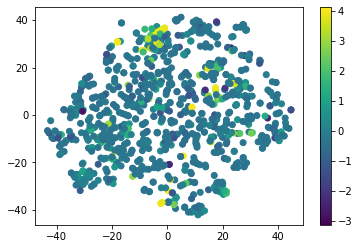

In [72]:
from matplotlib import pyplot as plt
plt.scatter(
    z_proj[:, 0],
    z_proj[:, 1],
    c=y,
)
plt.colorbar()